# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from utils.lexicon import Lexicon_FR_updated as lexicon_fr
from utils.io import boreholes_from_files, striplog_from_text,gdf_viewer,\
df_from_sources, striplog_from_df
from core.core import Project
from core.orm import BoreholeOrm, PositionOrm, Base 

import matplotlib.pyplot as plt
from os import remove
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

## Reading of CSV files in a dir

In [2]:
df = pd.read_csv('test_data_boreholes.csv', sep=',')

## Data Checking

In [3]:
df.drop('Z', axis='columns', inplace=True)
df.rename({'new_Z':'Z'}, axis='columns', inplace=True)

In [4]:
df.loc[df.query('Colour=="tan"').index, 'Colour'] = 'green' # use simple colour

In [5]:
df[:10]

,ID,X,Y,Z,Diameter,Length,Lithology,Colour,Thickness,Top_litho,Base_litho
0,BH001,152600.0,121039.0,101.0,0.43,39,sand,gainsboro,4,0,4
1,BH001,152600.0,121039.0,97.0,0.43,39,clay,green,4,4,8
2,BH001,152600.0,121039.0,93.0,0.43,39,sandstone,forestgreen,12,8,20
3,BH001,152600.0,121039.0,81.0,0.43,39,coal,antiquewhite,8,20,28
4,BH001,152600.0,121039.0,73.0,0.43,39,limestone,darkslategrey,11,28,39
5,BH002,152819.0,121586.0,103.0,0.60,37,sand,gainsboro,5,0,5
6,BH002,152819.0,121586.0,98.0,0.60,37,clay,green,3,5,8
7,BH002,152819.0,121586.0,95.0,0.60,37,sandstone,forestgreen,6,8,14
8,BH002,152819.0,121586.0,89.0,0.60,37,coal,antiquewhite,1,14,15
9,BH002,152819.0,121586.0,88.0,0.60,37,limestone,darkslategrey,22,15,37


## Create Boreholes from dataframes or files

In [6]:
bhs_df=[df] # list of dataframes

In [7]:
boreholes, components, link_intv_comp = boreholes_from_files(bhs_df, verbose=True,
                                                litho_field='Lithology',
                                                color_field='Colour',
                                                lexicon='en', #Lexicon.default(),
                                            diam_field='Diameter', 
                                            thick_field='Thickness')


Dataframe 0 processing...
|__ID:'BH001'
Error : No lithology matching with 'coal antiquewhite' in given lexicon
Summary : [Striplog(5 Intervals, start=0.0, stop=39.0)]
{0: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7fc7d73a4eb0>, 'base': <core.orm.PositionOrm object at 0x7fc7d73a4fd0>}, 1: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7fc7d73b4790>, 'base': <core.orm.PositionOrm object at 0x7fc7d73b4100>}, 2: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7fc7d73b4eb0>, 'base': <core.orm.PositionOrm object at 0x7fc7d73b4df0>}, 3: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7fc7d73b48b0>, 'base': <core.orm.PositionOrm object at 0x7fc7d73b4e20>}, 4: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7fc7d73b4460>, 'base': <core.o

/home/yanathan/Projects/GSDMA/utils/io.py:518: SAWarning: relationship 'ComponentOrm.intervals' will copy column Components.id to column Linkintervalcomponent.comp_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Components.id to Linkintervalcomponent.comp_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   The 'overlaps' parameter may be used to remove this warning.
  boreholes.append(BoreholeOrm(id=id_))
/home/yanathan/Projects/GSDMA/utils/io.py:518: SAWarning: relationship 'ComponentOrm.intervals' will copy column Intervals.id to column Linkintervalcomponent.int_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Intervals.id to Lin


Error : No lithology matching with 'coal antiquewhite' in given lexicon
Summary : [Striplog(5 Intervals, start=0.0, stop=37.0)]
{165: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7fc7d734ca90>, 'base': <core.orm.PositionOrm object at 0x7fc7d72ef400>}, 166: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7fc7d72cff10>, 'base': <core.orm.PositionOrm object at 0x7fc7d72a2bb0>}, 167: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7fc7d72c34c0>, 'base': <core.orm.PositionOrm object at 0x7fc7d728ccd0>}, 168: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7fc7d728cfd0>, 'base': <core.orm.PositionOrm object at 0x7fc7d728c310>}, 169: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7fc7d728caf0>, 'base': <core.orm.PositionOrm object at 0x7fc

|__ID:'BH072'
Error : No lithology matching with 'coal antiquewhite' in given lexicon
Summary : [Striplog(5 Intervals, start=0.0, stop=38.0)]
{355: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7fc7d7257a30>, 'base': <core.orm.PositionOrm object at 0x7fc7d7187dc0>}, 356: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7fc7d71ac040>, 'base': <core.orm.PositionOrm object at 0x7fc7d71ac340>}, 357: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7fc7d71ba9a0>, 'base': <core.orm.PositionOrm object at 0x7fc7d71bab80>}, 358: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7fc7d71baac0>, 'base': <core.orm.PositionOrm object at 0x7fc7d71ba940>}, 359: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7fc7d71ba280>, 'base': <core.orm.PositionOrm ob

|__ID:'BH114'
Error : No lithology matching with 'coal antiquewhite' in given lexicon
Summary : [Striplog(5 Intervals, start=0.0, stop=44.0)]
{565: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7fc7d705a0d0>, 'base': <core.orm.PositionOrm object at 0x7fc7d703e0d0>}, 566: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7fc7d703e2b0>, 'base': <core.orm.PositionOrm object at 0x7fc7d70b45b0>}, 567: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7fc7d70b4250>, 'base': <core.orm.PositionOrm object at 0x7fc7d70b4520>}, 568: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7fc7d70b43d0>, 'base': <core.orm.PositionOrm object at 0x7fc7d70649a0>}, 569: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7fc7d7064760>, 'base': <core.orm.PositionOrm ob

|__ID:'BH157'
Error : No lithology matching with 'coal antiquewhite' in given lexicon
Summary : [Striplog(5 Intervals, start=0.0, stop=41.0)]
{780: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7fc7d6f6daf0>, 'base': <core.orm.PositionOrm object at 0x7fc7d6f6da90>}, 781: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7fc7d6f6de50>, 'base': <core.orm.PositionOrm object at 0x7fc7d6f5f280>}, 782: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7fc7d6f5f190>, 'base': <core.orm.PositionOrm object at 0x7fc7d6f5faf0>}, 783: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7fc7d6f5f220>, 'base': <core.orm.PositionOrm object at 0x7fc7d6f50580>}, 784: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7fc7d6f501f0>, 'base': <core.orm.PositionOrm ob

|__ID:'BH188'
Error : No lithology matching with 'coal antiquewhite' in given lexicon
Summary : [Striplog(5 Intervals, start=0.0, stop=34.0)]
{935: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7fc7d70b4880>, 'base': <core.orm.PositionOrm object at 0x7fc7d70b4a00>}, 936: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7fc7d70b4a90>, 'base': <core.orm.PositionOrm object at 0x7fc7d70b47c0>}, 937: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7fc7d70b4fd0>, 'base': <core.orm.PositionOrm object at 0x7fc7d70b4e80>}, 938: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7fc7d703e190>, 'base': <core.orm.PositionOrm object at 0x7fc7d703e250>}, 939: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7fc7d703e700>, 'base': <core.orm.PositionOrm ob

In [8]:
boreholes

[<core.orm.BoreholeOrm>(Name=BH001, Length=39, Diameter=0.43, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=29, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=41, Diameter=0.57, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=31, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH011, Length=30, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH012, Length=41, Diameter=0.54, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH013, Length=29, Diameter=0.36, Intervals=5),
 <core.orm.Bore

In [9]:
components

{0: Component({'lithology': 'sandstone'}),
 1: Component({'lithology': 'limestone'}),
 2: Component({'lithology': 'sand', 'colour': 'white'}),
 3: Component({'lithology': 'clay', 'colour': 'green'}),
 4: Component({'lithology': 'sand'})}

In [10]:
len(boreholes), len(components)

(199, 5)

## Create a project and save data in a database

In [11]:
remove('tmp_files/tfe_orm_db.db')

In [12]:
engine = create_engine('sqlite:///tmp_files/tfe_orm_db.db', echo=True)

In [13]:
Base.metadata.create_all(engine)

2021-06-09 07:26:45,366 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:45,367 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Boreholes")
2021-06-09 07:26:45,367 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-09 07:26:45,369 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Boreholes")
2021-06-09 07:26:45,370 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-09 07:26:45,371 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Positions")
2021-06-09 07:26:45,371 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-09 07:26:45,372 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Positions")
2021-06-09 07:26:45,373 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-09 07:26:45,374 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Intervals")
2021-06-09 07:26:45,375 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-09 07:26:45,377 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Intervals")
2021-06-09 07:26:45,378 INFO sqlalchemy.engine.Engine 

In [14]:
Session = sessionmaker(bind=engine)
session = Session()

In [15]:
p = Project(session)
p.add_components(components)

2021-06-09 07:26:45,427 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:45,429 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:45,430 INFO sqlalchemy.engine.Engine [generated in 0.00100s] ()
None
2021-06-09 07:26:45,433 INFO sqlalchemy.engine.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-06-09 07:26:45,434 INFO sqlalchemy.engine.Engine [generated in 0.00083s] ((0, 'Sandstone'), (1, 'Limestone'), (2, 'Sand, white'), (3, 'Clay, green'), (4, 'Sand'))
2021-06-09 07:26:45,435 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:26:45,438 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:45,439 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:45,440 INFO sql

Add boreholes into the project

In [16]:
for bh in boreholes:
    p.add_borehole(bh)

2021-06-09 07:26:45,447 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:45,449 INFO sqlalchemy.engine.Engine [generated in 0.00193s] ('BH001', 39.0, 0.43)
2021-06-09 07:26:45,452 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:45,452 INFO sqlalchemy.engine.Engine [generated in 0.00084s] ((0, 0.0, 0.0, 0.0, 152600.0, 121039.0), (1, 4.0, 4.0, 4.0, 152600.0, 121039.0), (2, 4.0, 4.0, 4.0, 152600.0, 121039.0), (3, 8.0, 8.0, 8.0, 152600.0, 121039.0), (4, 8.0, 8.0, 8.0, 152600.0, 121039.0), (5, 20.0, 20.0, 20.0, 152600.0, 121039.0), (6, 20.0, 20.0, 20.0, 152600.0, 121039.0), (7, 28.0, 28.0, 28.0, 152600.0, 121039.0), (8, 28.0, 28.0, 28.0, 152600.0, 121039.0), (9, 39.0, 39.0, 39.0, 152600.0, 121039.0))
2021-06-09 07:26:45,455 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, 

None
2021-06-09 07:26:45,548 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:26:45,549 INFO sqlalchemy.engine.Engine [cached since 0.08266s ago] ('BH002',)
2021-06-09 07:26:45,551 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:45,552 INFO sqlalchemy.engine.Engine [cached since 0.07735s ago] (10,)
2021-06-09 07:26:45,554 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positi

2021-06-09 07:26:45,640 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:45,640 INFO sqlalchemy.engine.Engine [cached since 0.1627s ago] (23,)
2021-06-09 07:26:45,642 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:45,643 INFO sqlalchemy.engine.Engine [cached since 0.1688s ago] (24,)
2021-06-09 07:26:45,645 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 07:26:45,735 INFO sqlalchemy.engine.Engine [cached since 0.257s ago] (37,)
2021-06-09 07:26:45,736 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:45,737 INFO sqlalchemy.engine.Engine [cached since 0.2624s ago] (38,)
2021-06-09 07:26:45,739 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:45,739 INFO sqlalchemy.engine.Engine [cached since 0.2617s ago] (39,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created s

2021-06-09 07:26:45,871 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:45,872 INFO sqlalchemy.engine.Engine [cached since 0.4167s ago] ((25, 'BH006', 0, 'sand gainsboro', 50, 51), (26, 'BH006', 1, 'clay green', 52, 53), (27, 'BH006', 2, 'sandstone forestgreen', 54, 55), (28, 'BH006', 3, 'white sand', 56, 57), (29, 'BH006', 4, 'limestone darkslategrey', 58, 59))
2021-06-09 07:26:45,873 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:26:45,877 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:45,878 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:45,878 INFO sqlalchemy.engine.Engine [cached since 0.4491s ago] ()
None
2021-06-09 07:26:45,880 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Interva

2021-06-09 07:26:45,969 INFO sqlalchemy.engine.Engine [cached since 0.4947s ago] (60,)
2021-06-09 07:26:45,971 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:45,972 INFO sqlalchemy.engine.Engine [cached since 0.4942s ago] (61,)
2021-06-09 07:26:45,974 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:45,975 INFO sqlalchemy.engine.Engine [cached since 0.5002s ago] (62,)
2021-06-09 07:26:45,976 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 07:26:46,059 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:46,060 INFO sqlalchemy.engine.Engine [cached since 0.5822s ago] (75,)
2021-06-09 07:26:46,062 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:46,063 INFO sqlalchemy.engine.Engine [cached since 0.5883s ago] (76,)
2021-06-09 07:26:46,065 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 07:26:46,156 INFO sqlalchemy.engine.Engine [cached since 0.6781s ago] (89,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:46,192 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:46,193 INFO sqlalchemy.engine.Engine [cached since 0.7461s ago] ('BH10', 31.0, 0.31)
2021-06-09 07:26:46,195 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:46,196 INFO sqlalchemy.engine.Engine [cached since 0.7442s ago] ((90, 0.0, 0.0, 0.0, 152819.0, 121586.0), (91, 5.0, 5.0, 5.0, 152819.0, 121586.0), (92, 5.0, 5.0, 5.0, 152819.0, 121586.0), (93, 9.0, 9.0, 9.0, 152819.0, 121586.0), (94, 9.0, 9.0, 9.0, 152819.0, 121586.0), (95, 11.0, 11.0, 11.0, 152819.0, 121586.0), (96, 11.0, 11.0, 11.0, 152819.0, 121586.0), (97, 14.0, 14.0, 14.0, 152819.0, 1

2021-06-09 07:26:46,287 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:46,288 INFO sqlalchemy.engine.Engine [cached since 0.8587s ago] ()
None
2021-06-09 07:26:46,292 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:26:46,293 INFO sqlalchemy.engine.Engine [cached since 0.8265s ago] ('BH011',)
2021-06-09 07:26:46,295 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x 

2021-06-09 07:26:46,373 INFO sqlalchemy.engine.Engine [cached since 0.8987s ago] (112,)
2021-06-09 07:26:46,374 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:46,375 INFO sqlalchemy.engine.Engine [cached since 0.8973s ago] (113,)
2021-06-09 07:26:46,376 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:46,377 INFO sqlalchemy.engine.Engine [cached since 0.9024s ago] (114,)
2021-06-09 07:26:46,378 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 07:26:46,469 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:46,470 INFO sqlalchemy.engine.Engine [cached since 0.9924s ago] (127,)
2021-06-09 07:26:46,472 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:46,473 INFO sqlalchemy.engine.Engine [cached since 0.9982s ago] (128,)
2021-06-09 07:26:46,474 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 07:26:46,607 INFO sqlalchemy.engine.Engine [cached since 1.156s ago] ((140, 0.0, 0.0, 0.0, 152922.0, 121313.0), (141, 3.0, 3.0, 3.0, 152922.0, 121313.0), (142, 3.0, 3.0, 3.0, 152922.0, 121313.0), (143, 5.0, 5.0, 5.0, 152922.0, 121313.0), (144, 5.0, 5.0, 5.0, 152922.0, 121313.0), (145, 10.0, 10.0, 10.0, 152922.0, 121313.0), (146, 10.0, 10.0, 10.0, 152922.0, 121313.0), (147, 16.0, 16.0, 16.0, 152922.0, 121313.0), (148, 16.0, 16.0, 16.0, 152922.0, 121313.0), (149, 31.0, 31.0, 31.0, 152922.0, 121313.0))
2021-06-09 07:26:46,609 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:46,609 INFO sqlalchemy.engine.Engine [cached since 1.154s ago] ((70, 'BH015', 0, 'sand gainsboro', 140, 141), (71, 'BH015', 1, 'clay green', 142, 143), (72, 'BH015', 2, 'sandstone forestgreen', 144, 145), (73, 'BH015', 3, 'white sand', 146, 147), (74, 'BH015', 4, 'limestone darkslategrey', 148, 149))

2021-06-09 07:26:46,714 INFO sqlalchemy.engine.Engine [cached since 1.248s ago] ('BH016',)
2021-06-09 07:26:46,716 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:46,717 INFO sqlalchemy.engine.Engine [cached since 1.242s ago] (150,)
2021-06-09 07:26:46,718 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:46,719 INFO sqlalchemy.engine.Engine [cached since 1.241s ago] (151,)
2021-06-09 07:26:46,720 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 07:26:46,806 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:46,807 INFO sqlalchemy.engine.Engine [cached since 1.333s ago] (164,)
2021-06-09 07:26:46,808 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:46,809 INFO sqlalchemy.engine.Engine [cached since 1.331s ago] (165,)
2021-06-09 07:26:46,811 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 07:26:46,901 INFO sqlalchemy.engine.Engine [cached since 1.426s ago] (178,)
2021-06-09 07:26:46,903 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:46,903 INFO sqlalchemy.engine.Engine [cached since 1.426s ago] (179,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:46,941 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:46,941 INFO sqlalchemy.engine.Engine [cached since 1.494s ago] ('BH019', 30.0, 0.43)
2021-06-09 07:26:46,943 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?

2021-06-09 07:26:47,020 INFO sqlalchemy.engine.Engine [cached since 1.565s ago] ((95, 'BH020', 0, 'sand gainsboro', 190, 191), (96, 'BH020', 1, 'clay green', 192, 193), (97, 'BH020', 2, 'sandstone forestgreen', 194, 195), (98, 'BH020', 3, 'white sand', 196, 197), (99, 'BH020', 4, 'limestone darkslategrey', 198, 199))
2021-06-09 07:26:47,021 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:26:47,026 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:47,027 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:47,028 INFO sqlalchemy.engine.Engine [cached since 1.599s ago] ()
None
2021-06-09 07:26:47,033 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Interva

2021-06-09 07:26:47,120 INFO sqlalchemy.engine.Engine [cached since 1.642s ago] (201,)
2021-06-09 07:26:47,121 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:47,122 INFO sqlalchemy.engine.Engine [cached since 1.648s ago] (202,)
2021-06-09 07:26:47,124 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:47,125 INFO sqlalchemy.engine.Engine [cached since 1.647s ago] (203,)
2021-06-09 07:26:47,127 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 07:26:47,219 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:47,220 INFO sqlalchemy.engine.Engine [cached since 1.745s ago] (216,)
2021-06-09 07:26:47,222 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:47,223 INFO sqlalchemy.engine.Engine [cached since 1.745s ago] (217,)
2021-06-09 07:26:47,225 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:47,360 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:47,360 INFO sqlalchemy.engine.Engine [cached since 1.913s ago] ('BH024', 18.0, 0.39)
2021-06-09 07:26:47,362 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:47,363 INFO sqlalchemy.engine.Engine [cached since 1.912s ago] ((230, 0.0, 0.0, 0.0, 152473.0, 121460.0), (231, 1.0, 1.0, 1.0, 152473.0, 121460.0), (232, 1.0, 1.0, 1.0, 152473.0, 121460.0), (233, 5.0, 5.0, 5.0, 152473.0, 121460.0), (234, 5.0, 5.0, 5.0, 152473.0, 121460.0), (235, 11.0, 11.0, 11.0, 152473.0, 121460.0), (236, 11.0, 11.0, 11.0, 152473.0, 121460.0), (237, 16.0, 16.0, 16.0, 152473.0, 121460.0), (238, 16.0, 16.0, 16.0, 152473.0, 121460.0), (239, 18.0, 18.0, 18.0, 152473.0, 121460.0))
2021-06-09 07:26:47,365 INFO sqlalchemy.

2021-06-09 07:26:47,451 INFO sqlalchemy.engine.Engine [cached since 2.023s ago] ()
None
2021-06-09 07:26:47,454 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:26:47,455 INFO sqlalchemy.engine.Engine [cached since 1.989s ago] ('BH025',)
2021-06-09 07:26:47,457 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:47,458 INFO sqlalchemy.engine.Engine [cached since 1.983s ago] (240,)
2021-06-09 07:26:47,46

2021-06-09 07:26:47,545 INFO sqlalchemy.engine.Engine [cached since 2.071s ago] (252,)
2021-06-09 07:26:47,548 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:47,548 INFO sqlalchemy.engine.Engine [cached since 2.071s ago] (253,)
2021-06-09 07:26:47,551 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:47,552 INFO sqlalchemy.engine.Engine [cached since 2.077s ago] (254,)
2021-06-09 07:26:47,554 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 07:26:47,627 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:47,628 INFO sqlalchemy.engine.Engine [cached since 2.15s ago] (267,)
2021-06-09 07:26:47,630 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:47,631 INFO sqlalchemy.engine.Engine [cached since 2.156s ago] (268,)
2021-06-09 07:26:47,632 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "P

2021-06-09 07:26:47,740 INFO sqlalchemy.engine.Engine [cached since 2.289s ago] ((280, 0.0, 0.0, 0.0, 152375.0, 121002.0), (281, 5.0, 5.0, 5.0, 152375.0, 121002.0), (282, 5.0, 5.0, 5.0, 152375.0, 121002.0), (283, 9.0, 9.0, 9.0, 152375.0, 121002.0), (284, 9.0, 9.0, 9.0, 152375.0, 121002.0), (285, 15.0, 15.0, 15.0, 152375.0, 121002.0), (286, 15.0, 15.0, 15.0, 152375.0, 121002.0), (287, 17.0, 17.0, 17.0, 152375.0, 121002.0), (288, 17.0, 17.0, 17.0, 152375.0, 121002.0), (289, 26.0, 26.0, 26.0, 152375.0, 121002.0))
2021-06-09 07:26:47,742 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:47,742 INFO sqlalchemy.engine.Engine [cached since 2.287s ago] ((140, 'BH029', 0, 'sand gainsboro', 280, 281), (141, 'BH029', 1, 'clay green', 282, 283), (142, 'BH029', 2, 'sandstone forestgreen', 284, 285), (143, 'BH029', 3, 'white sand', 286, 287), (144, 'BH029', 4, 'limestone darkslategrey', 288, 

2021-06-09 07:26:47,842 INFO sqlalchemy.engine.Engine [cached since 2.375s ago] ('BH030',)
2021-06-09 07:26:47,843 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:47,844 INFO sqlalchemy.engine.Engine [cached since 2.369s ago] (290,)
2021-06-09 07:26:47,846 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:47,846 INFO sqlalchemy.engine.Engine [cached since 2.368s ago] (291,)
2021-06-09 07:26:47,848 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 07:26:47,923 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:47,924 INFO sqlalchemy.engine.Engine [cached since 2.449s ago] (304,)
2021-06-09 07:26:47,925 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:47,925 INFO sqlalchemy.engine.Engine [cached since 2.448s ago] (305,)
2021-06-09 07:26:47,926 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 07:26:47,994 INFO sqlalchemy.engine.Engine [cached since 2.519s ago] (318,)
2021-06-09 07:26:47,995 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:47,995 INFO sqlalchemy.engine.Engine [cached since 2.517s ago] (319,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:48,027 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:48,028 INFO sqlalchemy.engine.Engine [cached since 2.581s ago] ('BH033', 41.0, 0.3)
2021-06-09 07:26:48,030 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)

2021-06-09 07:26:48,103 INFO sqlalchemy.engine.Engine [cached since 2.648s ago] ((165, 'BH034', 0, 'sand gainsboro', 330, 331), (166, 'BH034', 1, 'clay green', 332, 333), (167, 'BH034', 2, 'sandstone forestgreen', 334, 335), (168, 'BH034', 3, 'white sand', 336, 337), (169, 'BH034', 4, 'limestone darkslategrey', 338, 339))
2021-06-09 07:26:48,104 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:26:48,108 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:48,109 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:48,110 INFO sqlalchemy.engine.Engine [cached since 2.681s ago] ()
None
2021-06-09 07:26:48,115 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "In

2021-06-09 07:26:48,190 INFO sqlalchemy.engine.Engine [cached since 2.712s ago] (341,)
2021-06-09 07:26:48,192 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:48,192 INFO sqlalchemy.engine.Engine [cached since 2.718s ago] (342,)
2021-06-09 07:26:48,194 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:48,194 INFO sqlalchemy.engine.Engine [cached since 2.716s ago] (343,)
2021-06-09 07:26:48,196 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 07:26:48,269 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:48,270 INFO sqlalchemy.engine.Engine [cached since 2.795s ago] (356,)
2021-06-09 07:26:48,271 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:48,272 INFO sqlalchemy.engine.Engine [cached since 2.794s ago] (357,)
2021-06-09 07:26:48,272 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:48,373 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:48,374 INFO sqlalchemy.engine.Engine [cached since 2.927s ago] ('BH038', 39.0, 0.42)
2021-06-09 07:26:48,376 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:48,377 INFO sqlalchemy.engine.Engine [cached since 2.925s ago] ((370, 0.0, 0.0, 0.0, 152150.0, 121579.0), (371, 2.0, 2.0, 2.0, 152150.0, 121579.0), (372, 2.0, 2.0, 2.0, 152150.0, 121579.0), (373, 6.0, 6.0, 6.0, 152150.0, 121579.0), (374, 6.0, 6.0, 6.0, 152150.0, 121579.0), (375, 17.0, 17.0, 17.0, 152150.0, 121579.0), (376, 17.0, 17.0, 17.0, 152150.0, 121579.0), (377, 19.0, 19.0, 19.0, 152150.0, 121579.0), (378, 19.0, 19.0, 19.0, 152150.0, 121579.0), (379, 39.0, 39.0, 39.0, 152150.0, 121579.0))
2021-06-09 07:26:48,378 INFO sqlalchemy.

2021-06-09 07:26:48,476 INFO sqlalchemy.engine.Engine [cached since 3.047s ago] ()
None
2021-06-09 07:26:48,480 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:26:48,480 INFO sqlalchemy.engine.Engine [cached since 3.014s ago] ('BH039',)
2021-06-09 07:26:48,482 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:48,482 INFO sqlalchemy.engine.Engine [cached since 3.008s ago] (380,)
2021-06-09 07:26:48,48

2021-06-09 07:26:48,572 INFO sqlalchemy.engine.Engine [cached since 3.098s ago] (392,)
2021-06-09 07:26:48,573 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:48,574 INFO sqlalchemy.engine.Engine [cached since 3.096s ago] (393,)
2021-06-09 07:26:48,576 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:48,576 INFO sqlalchemy.engine.Engine [cached since 3.102s ago] (394,)
2021-06-09 07:26:48,577 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 07:26:48,668 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:48,670 INFO sqlalchemy.engine.Engine [cached since 3.192s ago] (407,)
2021-06-09 07:26:48,672 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:48,673 INFO sqlalchemy.engine.Engine [cached since 3.198s ago] (408,)
2021-06-09 07:26:48,674 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 07:26:48,797 INFO sqlalchemy.engine.Engine [cached since 3.346s ago] ((420, 0.0, 0.0, 0.0, 152052.0, 121293.0), (421, 5.0, 5.0, 5.0, 152052.0, 121293.0), (422, 5.0, 5.0, 5.0, 152052.0, 121293.0), (423, 9.0, 9.0, 9.0, 152052.0, 121293.0), (424, 9.0, 9.0, 9.0, 152052.0, 121293.0), (425, 14.0, 14.0, 14.0, 152052.0, 121293.0), (426, 14.0, 14.0, 14.0, 152052.0, 121293.0), (427, 23.0, 23.0, 23.0, 152052.0, 121293.0), (428, 23.0, 23.0, 23.0, 152052.0, 121293.0), (429, 41.0, 41.0, 41.0, 152052.0, 121293.0))
2021-06-09 07:26:48,799 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:48,799 INFO sqlalchemy.engine.Engine [cached since 3.344s ago] ((210, 'BH043', 0, 'sand gainsboro', 420, 421), (211, 'BH043', 1, 'clay green', 422, 423), (212, 'BH043', 2, 'sandstone forestgreen', 424, 425), (213, 'BH043', 3, 'white sand', 426, 427), (214, 'BH043', 4, 'limestone darkslategrey', 428, 

2021-06-09 07:26:48,897 INFO sqlalchemy.engine.Engine [cached since 3.431s ago] ('BH044',)
2021-06-09 07:26:48,899 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:48,900 INFO sqlalchemy.engine.Engine [cached since 3.426s ago] (430,)
2021-06-09 07:26:48,903 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:48,904 INFO sqlalchemy.engine.Engine [cached since 3.426s ago] (431,)
2021-06-09 07:26:48,906 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 07:26:48,987 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:48,988 INFO sqlalchemy.engine.Engine [cached since 3.514s ago] (444,)
2021-06-09 07:26:48,989 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:48,990 INFO sqlalchemy.engine.Engine [cached since 3.512s ago] (445,)
2021-06-09 07:26:48,991 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 07:26:49,086 INFO sqlalchemy.engine.Engine [cached since 3.612s ago] (458,)
2021-06-09 07:26:49,088 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:49,088 INFO sqlalchemy.engine.Engine [cached since 3.611s ago] (459,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:49,124 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:49,125 INFO sqlalchemy.engine.Engine [cached since 3.678s ago] ('BH047', 36.0, 0.61)
2021-06-09 07:26:49,128 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?

2021-06-09 07:26:49,217 INFO sqlalchemy.engine.Engine [cached since 3.762s ago] ((235, 'BH048', 0, 'sand gainsboro', 470, 471), (236, 'BH048', 1, 'clay green', 472, 473), (237, 'BH048', 2, 'sandstone forestgreen', 474, 475), (238, 'BH048', 3, 'white sand', 476, 477), (239, 'BH048', 4, 'limestone darkslategrey', 478, 479))
2021-06-09 07:26:49,220 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:26:49,224 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:49,226 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:49,226 INFO sqlalchemy.engine.Engine [cached since 3.797s ago] ()
None
2021-06-09 07:26:49,232 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "In

2021-06-09 07:26:49,318 INFO sqlalchemy.engine.Engine [cached since 3.841s ago] (481,)
2021-06-09 07:26:49,320 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:49,321 INFO sqlalchemy.engine.Engine [cached since 3.847s ago] (482,)
2021-06-09 07:26:49,323 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:49,323 INFO sqlalchemy.engine.Engine [cached since 3.846s ago] (483,)
2021-06-09 07:26:49,326 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 07:26:49,414 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:49,414 INFO sqlalchemy.engine.Engine [cached since 3.94s ago] (496,)
2021-06-09 07:26:49,416 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:49,417 INFO sqlalchemy.engine.Engine [cached since 3.939s ago] (497,)
2021-06-09 07:26:49,419 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "P

True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:49,533 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:49,534 INFO sqlalchemy.engine.Engine [cached since 4.086s ago] ('BH052', 40.0, 0.63)
2021-06-09 07:26:49,535 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:49,536 INFO sqlalchemy.engine.Engine [cached since 4.084s ago] ((510, 0.0, 0.0, 0.0, 152000.0, 121113.0), (511, 4.0, 4.0, 4.0, 152000.0, 121113.0), (512, 4.0, 4.0, 4.0, 152000.0, 121113.0), (513, 8.0, 8.0, 8.0, 152000.0, 121113.0), (514, 8.0, 8.0, 8.0, 152000.0, 121113.0), (515, 18.0, 18.0, 18.0, 152000.0, 121113.0), (516, 18.0, 18.0, 18.0, 152000.0, 121113.0), (517, 27.0, 27.0, 27.0, 152000.0, 121113.0), (518, 27.0, 27.0, 27.0, 152000.0, 121113.0), (519, 40.0, 40.0, 40.0, 152000.0, 121113.0))
2021-06-09 07:26:49,537 INFO sqlalchemy.

2021-06-09 07:26:49,630 INFO sqlalchemy.engine.Engine [cached since 4.201s ago] ()
None
2021-06-09 07:26:49,634 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:26:49,635 INFO sqlalchemy.engine.Engine [cached since 4.168s ago] ('BH053',)
2021-06-09 07:26:49,636 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:49,637 INFO sqlalchemy.engine.Engine [cached since 4.162s ago] (520,)
2021-06-09 07:26:49,63

2021-06-09 07:26:49,717 INFO sqlalchemy.engine.Engine [cached since 4.242s ago] (532,)
2021-06-09 07:26:49,718 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:49,719 INFO sqlalchemy.engine.Engine [cached since 4.241s ago] (533,)
2021-06-09 07:26:49,720 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:49,721 INFO sqlalchemy.engine.Engine [cached since 4.246s ago] (534,)
2021-06-09 07:26:49,722 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 07:26:49,807 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:49,808 INFO sqlalchemy.engine.Engine [cached since 4.33s ago] (547,)
2021-06-09 07:26:49,809 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:49,810 INFO sqlalchemy.engine.Engine [cached since 4.335s ago] (548,)
2021-06-09 07:26:49,812 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "P

2021-06-09 07:26:49,927 INFO sqlalchemy.engine.Engine [cached since 4.476s ago] ((560, 0.0, 0.0, 0.0, 152748.0, 121877.0), (561, 3.0, 3.0, 3.0, 152748.0, 121877.0), (562, 3.0, 3.0, 3.0, 152748.0, 121877.0), (563, 5.0, 5.0, 5.0, 152748.0, 121877.0), (564, 5.0, 5.0, 5.0, 152748.0, 121877.0), (565, 14.0, 14.0, 14.0, 152748.0, 121877.0), (566, 14.0, 14.0, 14.0, 152748.0, 121877.0), (567, 23.0, 23.0, 23.0, 152748.0, 121877.0), (568, 23.0, 23.0, 23.0, 152748.0, 121877.0), (569, 45.0, 45.0, 45.0, 152748.0, 121877.0))
2021-06-09 07:26:49,929 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:49,929 INFO sqlalchemy.engine.Engine [cached since 4.474s ago] ((280, 'BH057', 0, 'sand gainsboro', 560, 561), (281, 'BH057', 1, 'clay green', 562, 563), (282, 'BH057', 2, 'sandstone forestgreen', 564, 565), (283, 'BH057', 3, 'white sand', 566, 567), (284, 'BH057', 4, 'limestone darkslategrey', 568, 

2021-06-09 07:26:50,095 INFO sqlalchemy.engine.Engine [cached since 4.629s ago] ('BH058',)
2021-06-09 07:26:50,097 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:50,098 INFO sqlalchemy.engine.Engine [cached since 4.623s ago] (570,)
2021-06-09 07:26:50,099 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:50,100 INFO sqlalchemy.engine.Engine [cached since 4.622s ago] (571,)
2021-06-09 07:26:50,101 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 07:26:50,185 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:50,186 INFO sqlalchemy.engine.Engine [cached since 4.712s ago] (584,)
2021-06-09 07:26:50,188 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:50,189 INFO sqlalchemy.engine.Engine [cached since 4.711s ago] (585,)
2021-06-09 07:26:50,191 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 07:26:50,271 INFO sqlalchemy.engine.Engine [cached since 4.797s ago] (598,)
2021-06-09 07:26:50,272 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:50,273 INFO sqlalchemy.engine.Engine [cached since 4.795s ago] (599,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:50,311 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:50,312 INFO sqlalchemy.engine.Engine [cached since 4.865s ago] ('BH061', 26.0, 0.37)
2021-06-09 07:26:50,314 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?

2021-06-09 07:26:50,396 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:26:50,400 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:50,401 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:50,402 INFO sqlalchemy.engine.Engine [cached since 4.973s ago] ()
None
2021-06-09 07:26:50,408 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:26:50,408 INFO sqlalchemy.engine.Engine [cached since 4.942s ago] ('BH062',)
2021-06-09 07:26:50,410 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Posit

2021-06-09 07:26:50,496 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:50,497 INFO sqlalchemy.engine.Engine [cached since 5.023s ago] (622,)
2021-06-09 07:26:50,499 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:50,499 INFO sqlalchemy.engine.Engine [cached since 5.022s ago] (623,)
2021-06-09 07:26:50,501 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 07:26:50,585 INFO sqlalchemy.engine.Engine [cached since 5.111s ago] (636,)
2021-06-09 07:26:50,586 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:50,587 INFO sqlalchemy.engine.Engine [cached since 5.109s ago] (637,)
2021-06-09 07:26:50,589 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:50,590 INFO sqlalchemy.engine.Engine [cached since 5.116s ago] (638,)
2021-06-09 07:26:50,592 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 07:26:50,696 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:50,696 INFO sqlalchemy.engine.Engine [cached since 5.245s ago] ((650, 0.0, 0.0, 0.0, 152647.0, 121169.0), (651, 4.0, 4.0, 4.0, 152647.0, 121169.0), (652, 4.0, 4.0, 4.0, 152647.0, 121169.0), (653, 5.0, 5.0, 5.0, 152647.0, 121169.0), (654, 5.0, 5.0, 5.0, 152647.0, 121169.0), (655, 14.0, 14.0, 14.0, 152647.0, 121169.0), (656, 14.0, 14.0, 14.0, 152647.0, 121169.0), (657, 16.0, 16.0, 16.0, 152647.0, 121169.0), (658, 16.0, 16.0, 16.0, 152647.0, 121169.0), (659, 24.0, 24.0, 24.0, 152647.0, 121169.0))
2021-06-09 07:26:50,698 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:50,698 INFO sqlalchemy.engine.Engine [cached since 5.243s ago] ((325, 'BH066', 0, 'sand gainsboro', 650, 651), (326, 'BH066', 1, 'clay green', 652, 653), (327, 'BH0

2021-06-09 07:26:50,800 INFO sqlalchemy.engine.Engine [cached since 5.334s ago] ('BH067',)
2021-06-09 07:26:50,802 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:50,803 INFO sqlalchemy.engine.Engine [cached since 5.328s ago] (660,)
2021-06-09 07:26:50,804 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:50,805 INFO sqlalchemy.engine.Engine [cached since 5.327s ago] (661,)
2021-06-09 07:26:50,807 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 07:26:50,891 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:50,891 INFO sqlalchemy.engine.Engine [cached since 5.417s ago] (674,)
2021-06-09 07:26:50,892 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:50,893 INFO sqlalchemy.engine.Engine [cached since 5.415s ago] (675,)
2021-06-09 07:26:50,894 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 07:26:50,977 INFO sqlalchemy.engine.Engine [cached since 5.503s ago] (688,)
2021-06-09 07:26:50,979 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:50,980 INFO sqlalchemy.engine.Engine [cached since 5.502s ago] (689,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:51,019 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:51,020 INFO sqlalchemy.engine.Engine [cached since 5.573s ago] ('BH070', 23.0, 0.69)
2021-06-09 07:26:51,022 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?

2021-06-09 07:26:51,100 INFO sqlalchemy.engine.Engine [cached since 5.645s ago] ((350, 'BH071', 0, 'sand gainsboro', 700, 701), (351, 'BH071', 1, 'clay green', 702, 703), (352, 'BH071', 2, 'sandstone forestgreen', 704, 705), (353, 'BH071', 3, 'white sand', 706, 707), (354, 'BH071', 4, 'limestone darkslategrey', 708, 709))
2021-06-09 07:26:51,101 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:26:51,106 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:51,107 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:51,108 INFO sqlalchemy.engine.Engine [cached since 5.679s ago] ()
None
2021-06-09 07:26:51,113 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "In

2021-06-09 07:26:51,190 INFO sqlalchemy.engine.Engine [cached since 5.712s ago] (711,)
2021-06-09 07:26:51,191 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:51,192 INFO sqlalchemy.engine.Engine [cached since 5.717s ago] (712,)
2021-06-09 07:26:51,193 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:51,194 INFO sqlalchemy.engine.Engine [cached since 5.716s ago] (713,)
2021-06-09 07:26:51,196 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 07:26:51,279 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:51,280 INFO sqlalchemy.engine.Engine [cached since 5.806s ago] (726,)
2021-06-09 07:26:51,282 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:51,284 INFO sqlalchemy.engine.Engine [cached since 5.806s ago] (727,)
2021-06-09 07:26:51,286 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:51,428 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:51,428 INFO sqlalchemy.engine.Engine [cached since 5.981s ago] ('BH075', 17.0, 0.44)
2021-06-09 07:26:51,430 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:51,431 INFO sqlalchemy.engine.Engine [cached since 5.98s ago] ((740, 0.0, 0.0, 0.0, 152594.0, 121565.0), (741, 4.0, 4.0, 4.0, 152594.0, 121565.0), (742, 4.0, 4.0, 4.0, 152594.0, 121565.0), (743, 6.0, 6.0, 6.0, 152594.0, 121565.0), (744, 6.0, 6.0, 6.0, 152594.0, 121565.0), (745, 13.0, 13.0, 13.0, 152594.0, 121565.0), (746, 13.0, 13.0, 13.0, 152594.0, 121565.0), (747, 16.0, 16.0, 16.0, 152594.0, 121565.0), (748, 16.0, 16.0, 16.0, 152594.0, 121565.0), (749, 17.0, 17.0, 17.0, 152594.0, 121565.0))
2021-06-09 07:26:51,433 INFO sqlalchemy.e

2021-06-09 07:26:51,525 INFO sqlalchemy.engine.Engine [cached since 6.096s ago] ()
None
2021-06-09 07:26:51,530 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:26:51,531 INFO sqlalchemy.engine.Engine [cached since 6.064s ago] ('BH076',)
2021-06-09 07:26:51,532 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:51,533 INFO sqlalchemy.engine.Engine [cached since 6.058s ago] (750,)
2021-06-09 07:26:51,53

2021-06-09 07:26:51,620 INFO sqlalchemy.engine.Engine [cached since 6.146s ago] (762,)
2021-06-09 07:26:51,622 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:51,623 INFO sqlalchemy.engine.Engine [cached since 6.145s ago] (763,)
2021-06-09 07:26:51,624 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:51,625 INFO sqlalchemy.engine.Engine [cached since 6.15s ago] (764,)
2021-06-09 07:26:51,626 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id

2021-06-09 07:26:51,711 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:51,711 INFO sqlalchemy.engine.Engine [cached since 6.234s ago] (777,)
2021-06-09 07:26:51,713 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:51,714 INFO sqlalchemy.engine.Engine [cached since 6.239s ago] (778,)
2021-06-09 07:26:51,715 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 07:26:51,830 INFO sqlalchemy.engine.Engine [cached since 6.378s ago] ((790, 0.0, 0.0, 0.0, 152696.0, 121590.0), (791, 2.0, 2.0, 2.0, 152696.0, 121590.0), (792, 2.0, 2.0, 2.0, 152696.0, 121590.0), (793, 6.0, 6.0, 6.0, 152696.0, 121590.0), (794, 6.0, 6.0, 6.0, 152696.0, 121590.0), (795, 10.0, 10.0, 10.0, 152696.0, 121590.0), (796, 10.0, 10.0, 10.0, 152696.0, 121590.0), (797, 18.0, 18.0, 18.0, 152696.0, 121590.0), (798, 18.0, 18.0, 18.0, 152696.0, 121590.0), (799, 25.0, 25.0, 25.0, 152696.0, 121590.0))
2021-06-09 07:26:51,831 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:51,832 INFO sqlalchemy.engine.Engine [cached since 6.377s ago] ((395, 'BH080', 0, 'sand gainsboro', 790, 791), (396, 'BH080', 1, 'clay green', 792, 793), (397, 'BH080', 2, 'sandstone forestgreen', 794, 795), (398, 'BH080', 3, 'white sand', 796, 797), (399, 'BH080', 4, 'limestone darkslategrey', 798, 

2021-06-09 07:26:51,929 INFO sqlalchemy.engine.Engine [cached since 6.463s ago] ('BH081',)
2021-06-09 07:26:51,931 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:51,932 INFO sqlalchemy.engine.Engine [cached since 6.457s ago] (800,)
2021-06-09 07:26:51,934 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:51,934 INFO sqlalchemy.engine.Engine [cached since 6.457s ago] (801,)
2021-06-09 07:26:51,936 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 07:26:52,021 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:52,022 INFO sqlalchemy.engine.Engine [cached since 6.548s ago] (814,)
2021-06-09 07:26:52,023 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:52,024 INFO sqlalchemy.engine.Engine [cached since 6.546s ago] (815,)
2021-06-09 07:26:52,025 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 07:26:52,114 INFO sqlalchemy.engine.Engine [cached since 6.64s ago] (828,)
2021-06-09 07:26:52,116 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:52,117 INFO sqlalchemy.engine.Engine [cached since 6.639s ago] (829,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:52,159 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:52,160 INFO sqlalchemy.engine.Engine [cached since 6.713s ago] ('BH084', 20.0, 0.61)
2021-06-09 07:26:52,163 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)

2021-06-09 07:26:52,249 INFO sqlalchemy.engine.Engine [cached since 6.794s ago] ((420, 'BH085', 0, 'sand gainsboro', 840, 841), (421, 'BH085', 1, 'clay green', 842, 843), (422, 'BH085', 2, 'sandstone forestgreen', 844, 845), (423, 'BH085', 3, 'white sand', 846, 847), (424, 'BH085', 4, 'limestone darkslategrey', 848, 849))
2021-06-09 07:26:52,251 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:26:52,255 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:52,256 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:52,257 INFO sqlalchemy.engine.Engine [cached since 6.828s ago] ()
None
2021-06-09 07:26:52,262 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "In

2021-06-09 07:26:52,344 INFO sqlalchemy.engine.Engine [cached since 6.866s ago] (851,)
2021-06-09 07:26:52,345 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:52,346 INFO sqlalchemy.engine.Engine [cached since 6.872s ago] (852,)
2021-06-09 07:26:52,347 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:52,349 INFO sqlalchemy.engine.Engine [cached since 6.871s ago] (853,)
2021-06-09 07:26:52,350 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 07:26:52,436 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:52,437 INFO sqlalchemy.engine.Engine [cached since 6.962s ago] (866,)
2021-06-09 07:26:52,438 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:52,439 INFO sqlalchemy.engine.Engine [cached since 6.961s ago] (867,)
2021-06-09 07:26:52,440 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:52,550 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:52,551 INFO sqlalchemy.engine.Engine [cached since 7.104s ago] ('BH089', 11.0, 0.63)
2021-06-09 07:26:52,553 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:52,554 INFO sqlalchemy.engine.Engine [cached since 7.102s ago] ((880, 0.0, 0.0, 0.0, 152134.0, 121576.0), (881, 1.0, 1.0, 1.0, 152134.0, 121576.0), (882, 1.0, 1.0, 1.0, 152134.0, 121576.0), (883, 3.0, 3.0, 3.0, 152134.0, 121576.0), (884, 3.0, 3.0, 3.0, 152134.0, 121576.0), (885, 6.0, 6.0, 6.0, 152134.0, 121576.0), (886, 6.0, 6.0, 6.0, 152134.0, 121576.0), (887, 7.0, 7.0, 7.0, 152134.0, 121576.0), (888, 7.0, 7.0, 7.0, 152134.0, 121576.0), (889, 11.0, 11.0, 11.0, 152134.0, 121576.0))
2021-06-09 07:26:52,555 INFO sqlalchemy.engine.Engin

2021-06-09 07:26:52,641 INFO sqlalchemy.engine.Engine [cached since 7.212s ago] ()
None
2021-06-09 07:26:52,646 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:26:52,647 INFO sqlalchemy.engine.Engine [cached since 7.181s ago] ('BH090',)
2021-06-09 07:26:52,650 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:52,651 INFO sqlalchemy.engine.Engine [cached since 7.176s ago] (890,)
2021-06-09 07:26:52,65

2021-06-09 07:26:52,732 INFO sqlalchemy.engine.Engine [cached since 7.258s ago] (902,)
2021-06-09 07:26:52,734 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:52,734 INFO sqlalchemy.engine.Engine [cached since 7.257s ago] (903,)
2021-06-09 07:26:52,736 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:52,737 INFO sqlalchemy.engine.Engine [cached since 7.262s ago] (904,)
2021-06-09 07:26:52,738 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 07:26:52,816 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:52,817 INFO sqlalchemy.engine.Engine [cached since 7.339s ago] (917,)
2021-06-09 07:26:52,818 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:52,819 INFO sqlalchemy.engine.Engine [cached since 7.344s ago] (918,)
2021-06-09 07:26:52,820 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 07:26:52,928 INFO sqlalchemy.engine.Engine [cached since 7.476s ago] ((930, 0.0, 0.0, 0.0, 152605.0, 121531.0), (931, 6.0, 6.0, 6.0, 152605.0, 121531.0), (932, 6.0, 6.0, 6.0, 152605.0, 121531.0), (933, 8.0, 8.0, 8.0, 152605.0, 121531.0), (934, 8.0, 8.0, 8.0, 152605.0, 121531.0), (935, 13.0, 13.0, 13.0, 152605.0, 121531.0), (936, 13.0, 13.0, 13.0, 152605.0, 121531.0), (937, 22.0, 22.0, 22.0, 152605.0, 121531.0), (938, 22.0, 22.0, 22.0, 152605.0, 121531.0), (939, 44.0, 44.0, 44.0, 152605.0, 121531.0))
2021-06-09 07:26:52,929 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:52,930 INFO sqlalchemy.engine.Engine [cached since 7.475s ago] ((465, 'BH094', 0, 'sand gainsboro', 930, 931), (466, 'BH094', 1, 'clay green', 932, 933), (467, 'BH094', 2, 'sandstone forestgreen', 934, 935), (468, 'BH094', 3, 'white sand', 936, 937), (469, 'BH094', 4, 'limestone darkslategrey', 938, 

2021-06-09 07:26:53,017 INFO sqlalchemy.engine.Engine [cached since 7.551s ago] ('BH095',)
2021-06-09 07:26:53,019 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:53,020 INFO sqlalchemy.engine.Engine [cached since 7.546s ago] (940,)
2021-06-09 07:26:53,022 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:53,023 INFO sqlalchemy.engine.Engine [cached since 7.546s ago] (941,)
2021-06-09 07:26:53,024 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 07:26:53,108 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:53,109 INFO sqlalchemy.engine.Engine [cached since 7.635s ago] (954,)
2021-06-09 07:26:53,110 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:53,111 INFO sqlalchemy.engine.Engine [cached since 7.633s ago] (955,)
2021-06-09 07:26:53,112 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 07:26:53,192 INFO sqlalchemy.engine.Engine [cached since 7.717s ago] (968,)
2021-06-09 07:26:53,193 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:53,194 INFO sqlalchemy.engine.Engine [cached since 7.716s ago] (969,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:53,230 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:53,230 INFO sqlalchemy.engine.Engine [cached since 7.783s ago] ('BH098', 33.0, 0.38)
2021-06-09 07:26:53,232 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?

2021-06-09 07:26:53,300 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:26:53,304 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:53,305 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:53,306 INFO sqlalchemy.engine.Engine [cached since 7.877s ago] ()
None
2021-06-09 07:26:53,311 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:26:53,312 INFO sqlalchemy.engine.Engine [cached since 7.846s ago] ('BH099',)
2021-06-09 07:26:53,315 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Posit

2021-06-09 07:26:53,392 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:53,392 INFO sqlalchemy.engine.Engine [cached since 7.918s ago] (992,)
2021-06-09 07:26:53,394 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:53,395 INFO sqlalchemy.engine.Engine [cached since 7.917s ago] (993,)
2021-06-09 07:26:53,396 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 07:26:53,470 INFO sqlalchemy.engine.Engine [cached since 7.996s ago] (1006,)
2021-06-09 07:26:53,472 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:53,473 INFO sqlalchemy.engine.Engine [cached since 7.995s ago] (1007,)
2021-06-09 07:26:53,475 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:53,476 INFO sqlalchemy.engine.Engine [cached since 8.001s ago] (1008,)
2021-06-09 07:26:53,477 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 07:26:53,601 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:53,602 INFO sqlalchemy.engine.Engine [cached since 8.151s ago] ((1020, 0.0, 0.0, 0.0, 152783.0, 121382.0), (1021, 1.0, 1.0, 1.0, 152783.0, 121382.0), (1022, 1.0, 1.0, 1.0, 152783.0, 121382.0), (1023, 2.0, 2.0, 2.0, 152783.0, 121382.0), (1024, 2.0, 2.0, 2.0, 152783.0, 121382.0), (1025, 12.0, 12.0, 12.0, 152783.0, 121382.0), (1026, 12.0, 12.0, 12.0, 152783.0, 121382.0), (1027, 16.0, 16.0, 16.0, 152783.0, 121382.0), (1028, 16.0, 16.0, 16.0, 152783.0, 121382.0), (1029, 21.0, 21.0, 21.0, 152783.0, 121382.0))
2021-06-09 07:26:53,603 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:53,604 INFO sqlalchemy.engine.Engine [cached since 8.148s ago] ((510, 'BH103', 0, 'sand gainsboro', 1020, 1021), (511, 'BH103', 1, 'clay green', 1022, 102

2021-06-09 07:26:53,689 INFO sqlalchemy.engine.Engine [cached since 8.223s ago] ('BH104',)
2021-06-09 07:26:53,691 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:53,692 INFO sqlalchemy.engine.Engine [cached since 8.217s ago] (1030,)
2021-06-09 07:26:53,694 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:53,694 INFO sqlalchemy.engine.Engine [cached since 8.217s ago] (1031,)
2021-06-09 07:26:53,696 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Posit

2021-06-09 07:26:53,772 INFO sqlalchemy.engine.Engine [cached since 8.295s ago] (1043,)
2021-06-09 07:26:53,774 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:53,774 INFO sqlalchemy.engine.Engine [cached since 8.3s ago] (1044,)
2021-06-09 07:26:53,775 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:53,776 INFO sqlalchemy.engine.Engine [cached since 8.298s ago] (1045,)
2021-06-09 07:26:53,777 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_

2021-06-09 07:26:53,860 INFO sqlalchemy.engine.Engine [cached since 8.382s ago] (1057,)
2021-06-09 07:26:53,861 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:53,862 INFO sqlalchemy.engine.Engine [cached since 8.387s ago] (1058,)
2021-06-09 07:26:53,863 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:53,863 INFO sqlalchemy.engine.Engine [cached since 8.386s ago] (1059,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry creat

2021-06-09 07:26:53,985 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:53,985 INFO sqlalchemy.engine.Engine [cached since 8.53s ago] ((535, 'BH108', 0, 'sand gainsboro', 1070, 1071), (536, 'BH108', 1, 'clay green', 1072, 1073), (537, 'BH108', 2, 'sandstone forestgreen', 1074, 1075), (538, 'BH108', 3, 'white sand', 1076, 1077), (539, 'BH108', 4, 'limestone darkslategrey', 1078, 1079))
2021-06-09 07:26:53,987 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:26:53,991 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:53,992 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:53,993 INFO sqlalchemy.engine.Engine [cached since 8.564s ago] ()
None
2021-06-09 07:26:53,998 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "I

2021-06-09 07:26:54,071 INFO sqlalchemy.engine.Engine [cached since 8.597s ago] (1080,)
2021-06-09 07:26:54,072 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:54,073 INFO sqlalchemy.engine.Engine [cached since 8.595s ago] (1081,)
2021-06-09 07:26:54,074 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:54,075 INFO sqlalchemy.engine.Engine [cached since 8.6s ago] (1082,)
2021-06-09 07:26:54,076 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_

2021-06-09 07:26:54,148 INFO sqlalchemy.engine.Engine [cached since 8.673s ago] (1094,)
2021-06-09 07:26:54,149 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:54,150 INFO sqlalchemy.engine.Engine [cached since 8.673s ago] (1095,)
2021-06-09 07:26:54,153 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:54,154 INFO sqlalchemy.engine.Engine [cached since 8.68s ago] (1096,)
2021-06-09 07:26:54,156 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions

2021-06-09 07:26:54,236 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:54,237 INFO sqlalchemy.engine.Engine [cached since 8.759s ago] (1109,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:54,276 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:54,277 INFO sqlalchemy.engine.Engine [cached since 8.829s ago] ('BH112', 33.0, 0.57)
2021-06-09 07:26:54,278 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:54,278 INFO sqlalchemy.engine.Engine [cached since 8.827s ago] ((11

2021-06-09 07:26:54,363 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:26:54,367 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:54,368 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:54,369 INFO sqlalchemy.engine.Engine [cached since 8.94s ago] ()
None
2021-06-09 07:26:54,375 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:26:54,376 INFO sqlalchemy.engine.Engine [cached since 8.91s ago] ('BH113',)
2021-06-09 07:26:54,378 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positio

2021-06-09 07:26:54,452 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:54,452 INFO sqlalchemy.engine.Engine [cached since 8.978s ago] (1132,)
2021-06-09 07:26:54,454 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:54,454 INFO sqlalchemy.engine.Engine [cached since 8.976s ago] (1133,)
2021-06-09 07:26:54,456 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 07:26:54,543 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:54,544 INFO sqlalchemy.engine.Engine [cached since 9.069s ago] (1146,)
2021-06-09 07:26:54,545 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:54,545 INFO sqlalchemy.engine.Engine [cached since 9.067s ago] (1147,)
2021-06-09 07:26:54,546 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:54,670 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:54,671 INFO sqlalchemy.engine.Engine [cached since 9.224s ago] ('BH117', 26.0, 0.33)
2021-06-09 07:26:54,673 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:54,674 INFO sqlalchemy.engine.Engine [cached since 9.222s ago] ((1160, 0.0, 0.0, 0.0, 152632.0, 121416.0), (1161, 3.0, 3.0, 3.0, 152632.0, 121416.0), (1162, 3.0, 3.0, 3.0, 152632.0, 121416.0), (1163, 4.0, 4.0, 4.0, 152632.0, 121416.0), (1164, 4.0, 4.0, 4.0, 152632.0, 121416.0), (1165, 15.0, 15.0, 15.0, 152632.0, 121416.0), (1166, 15.0, 15.0, 15.0, 152632.0, 121416.0), (1167, 24.0, 24.0, 24.0, 152632.0, 121416.0), (1168, 24.0, 24.0, 24.0, 152632.0, 121416.0), (1169, 26.0, 26.

2021-06-09 07:26:54,760 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:54,761 INFO sqlalchemy.engine.Engine [cached since 9.332s ago] ()
None
2021-06-09 07:26:54,767 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:26:54,768 INFO sqlalchemy.engine.Engine [cached since 9.301s ago] ('BH118',)
2021-06-09 07:26:54,770 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS

2021-06-09 07:26:54,843 INFO sqlalchemy.engine.Engine [cached since 9.368s ago] (1182,)
2021-06-09 07:26:54,844 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:54,844 INFO sqlalchemy.engine.Engine [cached since 9.366s ago] (1183,)
2021-06-09 07:26:54,846 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:54,846 INFO sqlalchemy.engine.Engine [cached since 9.372s ago] (1184,)
2021-06-09 07:26:54,848 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 07:26:54,930 INFO sqlalchemy.engine.Engine [cached since 9.455s ago] (1196,)
2021-06-09 07:26:54,932 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:54,933 INFO sqlalchemy.engine.Engine [cached since 9.455s ago] (1197,)
2021-06-09 07:26:54,935 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:54,936 INFO sqlalchemy.engine.Engine [cached since 9.462s ago] (1198,)
2021-06-09 07:26:54,938 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 07:26:55,052 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:55,053 INFO sqlalchemy.engine.Engine [cached since 9.601s ago] ((1210, 0.0, 0.0, 0.0, 152119.0, 121459.0), (1211, 5.0, 5.0, 5.0, 152119.0, 121459.0), (1212, 5.0, 5.0, 5.0, 152119.0, 121459.0), (1213, 6.0, 6.0, 6.0, 152119.0, 121459.0), (1214, 6.0, 6.0, 6.0, 152119.0, 121459.0), (1215, 12.0, 12.0, 12.0, 152119.0, 121459.0), (1216, 12.0, 12.0, 12.0, 152119.0, 121459.0), (1217, 18.0, 18.0, 18.0, 152119.0, 121459.0), (1218, 18.0, 18.0, 18.0, 152119.0, 121459.0), (1219, 36.0, 36.0, 36.0, 152119.0, 121459.0))
2021-06-09 07:26:55,055 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:55,056 INFO sqlalchemy.engine.Engine [cached since 9.6s ago] ((605, 'BH122', 0, 'sand gainsboro', 1210, 1211), (606, 'BH122', 1, 'clay green', 1212, 1213)

2021-06-09 07:26:55,153 INFO sqlalchemy.engine.Engine [cached since 9.686s ago] ('BH123',)
2021-06-09 07:26:55,155 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:55,156 INFO sqlalchemy.engine.Engine [cached since 9.681s ago] (1220,)
2021-06-09 07:26:55,157 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:55,158 INFO sqlalchemy.engine.Engine [cached since 9.68s ago] (1221,)
2021-06-09 07:26:55,159 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positi

2021-06-09 07:26:55,236 INFO sqlalchemy.engine.Engine [cached since 9.758s ago] (1233,)
2021-06-09 07:26:55,237 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:55,238 INFO sqlalchemy.engine.Engine [cached since 9.764s ago] (1234,)
2021-06-09 07:26:55,240 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:55,241 INFO sqlalchemy.engine.Engine [cached since 9.763s ago] (1235,)
2021-06-09 07:26:55,243 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 07:26:55,326 INFO sqlalchemy.engine.Engine [cached since 9.849s ago] (1247,)
2021-06-09 07:26:55,328 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:55,329 INFO sqlalchemy.engine.Engine [cached since 9.854s ago] (1248,)
2021-06-09 07:26:55,331 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:55,332 INFO sqlalchemy.engine.Engine [cached since 9.854s ago] (1249,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry creat

2021-06-09 07:26:55,459 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:55,460 INFO sqlalchemy.engine.Engine [cached since 10s ago] ((630, 'BH127', 0, 'sand gainsboro', 1260, 1261), (631, 'BH127', 1, 'clay green', 1262, 1263), (632, 'BH127', 2, 'sandstone forestgreen', 1264, 1265), (633, 'BH127', 3, 'white sand', 1266, 1267), (634, 'BH127', 4, 'limestone darkslategrey', 1268, 1269))
2021-06-09 07:26:55,461 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:26:55,467 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:55,467 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:55,468 INFO sqlalchemy.engine.Engine [cached since 10.04s ago] ()
None
2021-06-09 07:26:55,476 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Int

2021-06-09 07:26:55,557 INFO sqlalchemy.engine.Engine [cached since 10.08s ago] (1270,)
2021-06-09 07:26:55,559 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:55,559 INFO sqlalchemy.engine.Engine [cached since 10.08s ago] (1271,)
2021-06-09 07:26:55,561 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:55,562 INFO sqlalchemy.engine.Engine [cached since 10.09s ago] (1272,)
2021-06-09 07:26:55,564 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 07:26:55,644 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:55,645 INFO sqlalchemy.engine.Engine [cached since 10.17s ago] (1285,)
2021-06-09 07:26:55,646 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:55,647 INFO sqlalchemy.engine.Engine [cached since 10.17s ago] (1286,)
2021-06-09 07:26:55,648 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 07:26:55,731 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:55,731 INFO sqlalchemy.engine.Engine [cached since 10.25s ago] (1299,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:55,771 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:55,771 INFO sqlalchemy.engine.Engine [cached since 10.32s ago] ('BH131', 19.0, 0.38)
2021-06-09 07:26:55,772 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:55,772 INFO sqlalchemy.engine.Engine [cached since 10.32s ago] ((13

2021-06-09 07:26:55,862 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:26:55,867 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:55,867 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:55,868 INFO sqlalchemy.engine.Engine [cached since 10.44s ago] ()
None
2021-06-09 07:26:55,873 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:26:55,874 INFO sqlalchemy.engine.Engine [cached since 10.41s ago] ('BH132',)
2021-06-09 07:26:55,876 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Posit

2021-06-09 07:26:55,960 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:55,960 INFO sqlalchemy.engine.Engine [cached since 10.49s ago] (1322,)
2021-06-09 07:26:55,962 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:55,963 INFO sqlalchemy.engine.Engine [cached since 10.48s ago] (1323,)
2021-06-09 07:26:55,964 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 07:26:56,047 INFO sqlalchemy.engine.Engine [cached since 10.57s ago] (1336,)
2021-06-09 07:26:56,048 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:56,049 INFO sqlalchemy.engine.Engine [cached since 10.57s ago] (1337,)
2021-06-09 07:26:56,051 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:56,051 INFO sqlalchemy.engine.Engine [cached since 10.58s ago] (1338,)
2021-06-09 07:26:56,053 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 07:26:56,176 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:56,177 INFO sqlalchemy.engine.Engine [cached since 10.73s ago] ((1350, 0.0, 0.0, 0.0, 152316.0, 121519.0), (1351, 5.0, 5.0, 5.0, 152316.0, 121519.0), (1352, 5.0, 5.0, 5.0, 152316.0, 121519.0), (1353, 9.0, 9.0, 9.0, 152316.0, 121519.0), (1354, 9.0, 9.0, 9.0, 152316.0, 121519.0), (1355, 14.0, 14.0, 14.0, 152316.0, 121519.0), (1356, 14.0, 14.0, 14.0, 152316.0, 121519.0), (1357, 15.0, 15.0, 15.0, 152316.0, 121519.0), (1358, 15.0, 15.0, 15.0, 152316.0, 121519.0), (1359, 36.0, 36.0, 36.0, 152316.0, 121519.0))
2021-06-09 07:26:56,178 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:56,179 INFO sqlalchemy.engine.Engine [cached since 10.72s ago] ((675, 'BH136', 0, 'sand gainsboro', 1350, 1351), (676, 'BH136', 1, 'clay green', 1352, 135

2021-06-09 07:26:56,361 INFO sqlalchemy.engine.Engine [cached since 10.89s ago] ('BH137',)
2021-06-09 07:26:56,364 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:56,365 INFO sqlalchemy.engine.Engine [cached since 10.89s ago] (1360,)
2021-06-09 07:26:56,367 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:56,367 INFO sqlalchemy.engine.Engine [cached since 10.89s ago] (1361,)
2021-06-09 07:26:56,369 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Posit

2021-06-09 07:26:56,463 INFO sqlalchemy.engine.Engine [cached since 10.98s ago] (1373,)
2021-06-09 07:26:56,465 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:56,466 INFO sqlalchemy.engine.Engine [cached since 10.99s ago] (1374,)
2021-06-09 07:26:56,467 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:56,468 INFO sqlalchemy.engine.Engine [cached since 10.99s ago] (1375,)
2021-06-09 07:26:56,469 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 07:26:56,554 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:56,554 INFO sqlalchemy.engine.Engine [cached since 11.08s ago] (1388,)
2021-06-09 07:26:56,555 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:56,556 INFO sqlalchemy.engine.Engine [cached since 11.08s ago] (1389,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:56,588 INFO 

2021-06-09 07:26:56,667 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:56,668 INFO sqlalchemy.engine.Engine [cached since 11.21s ago] ((700, 'BH141', 0, 'sand gainsboro', 1400, 1401), (701, 'BH141', 1, 'clay green', 1402, 1403), (702, 'BH141', 2, 'sandstone forestgreen', 1404, 1405), (703, 'BH141', 3, 'white sand', 1406, 1407), (704, 'BH141', 4, 'limestone darkslategrey', 1408, 1409))
2021-06-09 07:26:56,669 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:26:56,673 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:56,674 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:56,675 INFO sqlalchemy.engine.Engine [cached since 11.25s ago] ()
None
2021-06-09 07:26:56,681 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "

2021-06-09 07:26:56,772 INFO sqlalchemy.engine.Engine [cached since 11.3s ago] (1410,)
2021-06-09 07:26:56,774 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:56,775 INFO sqlalchemy.engine.Engine [cached since 11.3s ago] (1411,)
2021-06-09 07:26:56,776 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:56,776 INFO sqlalchemy.engine.Engine [cached since 11.3s ago] (1412,)
2021-06-09 07:26:56,778 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 07:26:56,870 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:56,870 INFO sqlalchemy.engine.Engine [cached since 11.39s ago] (1425,)
2021-06-09 07:26:56,871 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:56,872 INFO sqlalchemy.engine.Engine [cached since 11.4s ago] (1426,)
2021-06-09 07:26:56,873 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", 

2021-06-09 07:26:56,968 INFO sqlalchemy.engine.Engine [cached since 11.49s ago] (1439,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:57,006 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:57,007 INFO sqlalchemy.engine.Engine [cached since 11.56s ago] ('BH145', 28.0, 0.6)
2021-06-09 07:26:57,009 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:57,010 INFO sqlalchemy.engine.Engine [cached since 11.56s ago] ((1440, 0.0, 0.0, 0.0, 152674.0, 121683.0), (1441, 4.0, 4.0, 4.0, 152674.0, 121683.0), (1442, 4.0, 4.0, 4.0, 152674.0, 121683.0), (1443, 8.0, 8.0, 8.0, 152674.0, 121683.0), (1444, 8.0, 8.0, 8.0, 152674.0, 121683.0), (1445, 18.0, 18.0, 18.0, 152674.0, 121683.0), (1446, 18.0, 18.0, 18.0, 152674.0, 121683.0), (1447, 26.0, 26.0, 26

2021-06-09 07:26:57,103 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:57,104 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:57,105 INFO sqlalchemy.engine.Engine [cached since 11.68s ago] ()
None
2021-06-09 07:26:57,112 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:26:57,113 INFO sqlalchemy.engine.Engine [cached since 11.65s ago] ('BH146',)
2021-06-09 07:26:57,115 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Posi

2021-06-09 07:26:57,200 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:57,201 INFO sqlalchemy.engine.Engine [cached since 11.73s ago] (1462,)
2021-06-09 07:26:57,202 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:57,202 INFO sqlalchemy.engine.Engine [cached since 11.72s ago] (1463,)
2021-06-09 07:26:57,204 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 07:26:57,281 INFO sqlalchemy.engine.Engine [cached since 11.81s ago] (1476,)
2021-06-09 07:26:57,283 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:57,283 INFO sqlalchemy.engine.Engine [cached since 11.81s ago] (1477,)
2021-06-09 07:26:57,285 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:57,285 INFO sqlalchemy.engine.Engine [cached since 11.81s ago] (1478,)
2021-06-09 07:26:57,287 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 07:26:57,404 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:57,404 INFO sqlalchemy.engine.Engine [cached since 11.95s ago] ((1490, 0.0, 0.0, 0.0, 152004.0, 121545.0), (1491, 6.0, 6.0, 6.0, 152004.0, 121545.0), (1492, 6.0, 6.0, 6.0, 152004.0, 121545.0), (1493, 9.0, 9.0, 9.0, 152004.0, 121545.0), (1494, 9.0, 9.0, 9.0, 152004.0, 121545.0), (1495, 13.0, 13.0, 13.0, 152004.0, 121545.0), (1496, 13.0, 13.0, 13.0, 152004.0, 121545.0), (1497, 22.0, 22.0, 22.0, 152004.0, 121545.0), (1498, 22.0, 22.0, 22.0, 152004.0, 121545.0), (1499, 44.0, 44.0, 44.0, 152004.0, 121545.0))
2021-06-09 07:26:57,406 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:57,406 INFO sqlalchemy.engine.Engine [cached since 11.95s ago] ((745, 'BH150', 0, 'sand gainsboro', 1490, 1491), (746, 'BH150', 1, 'clay green', 1492, 149

2021-06-09 07:26:57,511 INFO sqlalchemy.engine.Engine [cached since 12.04s ago] ('BH151',)
2021-06-09 07:26:57,513 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:57,513 INFO sqlalchemy.engine.Engine [cached since 12.04s ago] (1500,)
2021-06-09 07:26:57,515 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:57,516 INFO sqlalchemy.engine.Engine [cached since 12.04s ago] (1501,)
2021-06-09 07:26:57,517 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Posit

2021-06-09 07:26:57,599 INFO sqlalchemy.engine.Engine [cached since 12.12s ago] (1513,)
2021-06-09 07:26:57,600 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:57,600 INFO sqlalchemy.engine.Engine [cached since 12.13s ago] (1514,)
2021-06-09 07:26:57,601 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:57,602 INFO sqlalchemy.engine.Engine [cached since 12.12s ago] (1515,)
2021-06-09 07:26:57,603 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 07:26:57,675 INFO sqlalchemy.engine.Engine [cached since 12.2s ago] (1527,)
2021-06-09 07:26:57,676 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:57,677 INFO sqlalchemy.engine.Engine [cached since 12.2s ago] (1528,)
2021-06-09 07:26:57,678 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:57,679 INFO sqlalchemy.engine.Engine [cached since 12.2s ago] (1529,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created 

2021-06-09 07:26:57,797 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:57,797 INFO sqlalchemy.engine.Engine [cached since 12.34s ago] ((770, 'BH155', 0, 'sand gainsboro', 1540, 1541), (771, 'BH155', 1, 'clay green', 1542, 1543), (772, 'BH155', 2, 'sandstone forestgreen', 1544, 1545), (773, 'BH155', 3, 'white sand', 1546, 1547), (774, 'BH155', 4, 'limestone darkslategrey', 1548, 1549))
2021-06-09 07:26:57,798 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:26:57,802 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:57,803 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:57,804 INFO sqlalchemy.engine.Engine [cached since 12.37s ago] ()
None
2021-06-09 07:26:57,810 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "

2021-06-09 07:26:57,890 INFO sqlalchemy.engine.Engine [cached since 12.42s ago] (1550,)
2021-06-09 07:26:57,892 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:57,893 INFO sqlalchemy.engine.Engine [cached since 12.42s ago] (1551,)
2021-06-09 07:26:57,894 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:57,895 INFO sqlalchemy.engine.Engine [cached since 12.42s ago] (1552,)
2021-06-09 07:26:57,897 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 07:26:57,972 INFO sqlalchemy.engine.Engine [cached since 12.5s ago] (1564,)
2021-06-09 07:26:57,973 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:57,973 INFO sqlalchemy.engine.Engine [cached since 12.5s ago] (1565,)
2021-06-09 07:26:57,975 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:57,975 INFO sqlalchemy.engine.Engine [cached since 12.5s ago] (1566,)
2021-06-09 07:26:57,976 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 07:26:58,049 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:58,050 INFO sqlalchemy.engine.Engine [cached since 12.57s ago] (1579,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:58,081 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:58,082 INFO sqlalchemy.engine.Engine [cached since 12.64s ago] ('BH159', 48.0, 0.43)
2021-06-09 07:26:58,084 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:58,084 INFO sqlalchemy.engine.Engine [cached since 12.63s ago] ((15

2021-06-09 07:26:58,163 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:26:58,168 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:58,169 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:58,170 INFO sqlalchemy.engine.Engine [cached since 12.74s ago] ()
None
2021-06-09 07:26:58,174 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:26:58,175 INFO sqlalchemy.engine.Engine [cached since 12.71s ago] ('BH160',)
2021-06-09 07:26:58,176 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Posit

2021-06-09 07:26:58,247 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:58,248 INFO sqlalchemy.engine.Engine [cached since 12.77s ago] (1602,)
2021-06-09 07:26:58,249 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:58,250 INFO sqlalchemy.engine.Engine [cached since 12.77s ago] (1603,)
2021-06-09 07:26:58,251 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 07:26:58,334 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:58,335 INFO sqlalchemy.engine.Engine [cached since 12.86s ago] (1616,)
2021-06-09 07:26:58,337 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:58,338 INFO sqlalchemy.engine.Engine [cached since 12.86s ago] (1617,)
2021-06-09 07:26:58,340 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:58,445 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:58,445 INFO sqlalchemy.engine.Engine [cached since 13s ago] ('BH164', 24.0, 0.3)
2021-06-09 07:26:58,447 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:58,448 INFO sqlalchemy.engine.Engine [cached since 13s ago] ((1630, 0.0, 0.0, 0.0, 152865.0, 121467.0), (1631, 4.0, 4.0, 4.0, 152865.0, 121467.0), (1632, 4.0, 4.0, 4.0, 152865.0, 121467.0), (1633, 7.0, 7.0, 7.0, 152865.0, 121467.0), (1634, 7.0, 7.0, 7.0, 152865.0, 121467.0), (1635, 8.0, 8.0, 8.0, 152865.0, 121467.0), (1636, 8.0, 8.0, 8.0, 152865.0, 121467.0), (1637, 12.0, 12.0, 12.0, 152865.0, 121467.0), (1638, 12.0, 12.0, 12.0, 152865.0, 121467.0), (1639, 24.0, 24.0, 24.0, 152865.0, 121467.0))
2021-06-09 07:26:58,449 INFO sqlalchemy.eng

2021-06-09 07:26:58,529 INFO sqlalchemy.engine.Engine [cached since 13.1s ago] ()
None
2021-06-09 07:26:58,536 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:26:58,537 INFO sqlalchemy.engine.Engine [cached since 13.07s ago] ('BH165',)
2021-06-09 07:26:58,539 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:58,540 INFO sqlalchemy.engine.Engine [cached since 13.07s ago] (1640,)
2021-06-09 07:26:58,54

2021-06-09 07:26:58,617 INFO sqlalchemy.engine.Engine [cached since 13.14s ago] (1652,)
2021-06-09 07:26:58,618 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:58,619 INFO sqlalchemy.engine.Engine [cached since 13.14s ago] (1653,)
2021-06-09 07:26:58,620 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:58,621 INFO sqlalchemy.engine.Engine [cached since 13.15s ago] (1654,)
2021-06-09 07:26:58,622 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 07:26:58,697 INFO sqlalchemy.engine.Engine [cached since 13.22s ago] (1666,)
2021-06-09 07:26:58,699 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:58,699 INFO sqlalchemy.engine.Engine [cached since 13.22s ago] (1667,)
2021-06-09 07:26:58,700 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:58,701 INFO sqlalchemy.engine.Engine [cached since 13.23s ago] (1668,)
2021-06-09 07:26:58,702 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 07:26:58,816 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:58,817 INFO sqlalchemy.engine.Engine [cached since 13.37s ago] ((1680, 0.0, 0.0, 0.0, 152202.0, 121630.0), (1681, 5.0, 5.0, 5.0, 152202.0, 121630.0), (1682, 5.0, 5.0, 5.0, 152202.0, 121630.0), (1683, 9.0, 9.0, 9.0, 152202.0, 121630.0), (1684, 9.0, 9.0, 9.0, 152202.0, 121630.0), (1685, 17.0, 17.0, 17.0, 152202.0, 121630.0), (1686, 17.0, 17.0, 17.0, 152202.0, 121630.0), (1687, 20.0, 20.0, 20.0, 152202.0, 121630.0), (1688, 20.0, 20.0, 20.0, 152202.0, 121630.0), (1689, 38.0, 38.0, 38.0, 152202.0, 121630.0))
2021-06-09 07:26:58,818 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:58,819 INFO sqlalchemy.engine.Engine [cached since 13.36s ago] ((840, 'BH169', 0, 'sand gainsboro', 1680, 1681), (841, 'BH169', 1, 'clay green', 1682, 168

2021-06-09 07:26:58,915 INFO sqlalchemy.engine.Engine [cached since 13.45s ago] ('BH170',)
2021-06-09 07:26:58,916 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:58,917 INFO sqlalchemy.engine.Engine [cached since 13.44s ago] (1690,)
2021-06-09 07:26:58,918 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:58,919 INFO sqlalchemy.engine.Engine [cached since 13.44s ago] (1691,)
2021-06-09 07:26:58,920 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Posit

2021-06-09 07:26:59,011 INFO sqlalchemy.engine.Engine [cached since 13.53s ago] (1703,)
2021-06-09 07:26:59,013 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:59,014 INFO sqlalchemy.engine.Engine [cached since 13.54s ago] (1704,)
2021-06-09 07:26:59,015 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:59,016 INFO sqlalchemy.engine.Engine [cached since 13.54s ago] (1705,)
2021-06-09 07:26:59,018 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 07:26:59,101 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:59,102 INFO sqlalchemy.engine.Engine [cached since 13.63s ago] (1718,)
2021-06-09 07:26:59,104 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:59,104 INFO sqlalchemy.engine.Engine [cached since 13.63s ago] (1719,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:59,147 INFO 

2021-06-09 07:26:59,228 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:59,229 INFO sqlalchemy.engine.Engine [cached since 13.77s ago] ((865, 'BH174', 0, 'sand gainsboro', 1730, 1731), (866, 'BH174', 1, 'clay green', 1732, 1733), (867, 'BH174', 2, 'sandstone forestgreen', 1734, 1735), (868, 'BH174', 3, 'white sand', 1736, 1737), (869, 'BH174', 4, 'limestone darkslategrey', 1738, 1739))
2021-06-09 07:26:59,230 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:26:59,234 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:59,235 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:59,235 INFO sqlalchemy.engine.Engine [cached since 13.81s ago] ()
None
2021-06-09 07:26:59,239 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "

2021-06-09 07:26:59,326 INFO sqlalchemy.engine.Engine [cached since 13.85s ago] (1740,)
2021-06-09 07:26:59,327 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:59,328 INFO sqlalchemy.engine.Engine [cached since 13.85s ago] (1741,)
2021-06-09 07:26:59,329 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:59,330 INFO sqlalchemy.engine.Engine [cached since 13.86s ago] (1742,)
2021-06-09 07:26:59,332 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 07:26:59,418 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:59,418 INFO sqlalchemy.engine.Engine [cached since 13.94s ago] (1755,)
2021-06-09 07:26:59,420 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:59,421 INFO sqlalchemy.engine.Engine [cached since 13.95s ago] (1756,)
2021-06-09 07:26:59,423 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 07:26:59,509 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:59,509 INFO sqlalchemy.engine.Engine [cached since 14.03s ago] (1769,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:59,543 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:59,544 INFO sqlalchemy.engine.Engine [cached since 14.1s ago] ('BH178', 30.0, 0.57)
2021-06-09 07:26:59,545 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:59,546 INFO sqlalchemy.engine.Engine [cached since 14.09s ago] ((177

2021-06-09 07:26:59,624 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:26:59,629 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:26:59,630 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:26:59,631 INFO sqlalchemy.engine.Engine [cached since 14.2s ago] ()
None
2021-06-09 07:26:59,638 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:26:59,639 INFO sqlalchemy.engine.Engine [cached since 14.17s ago] ('BH179',)
2021-06-09 07:26:59,642 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positi

2021-06-09 07:26:59,724 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:59,725 INFO sqlalchemy.engine.Engine [cached since 14.25s ago] (1792,)
2021-06-09 07:26:59,728 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:59,729 INFO sqlalchemy.engine.Engine [cached since 14.25s ago] (1793,)
2021-06-09 07:26:59,731 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 07:26:59,802 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:59,803 INFO sqlalchemy.engine.Engine [cached since 14.33s ago] (1806,)
2021-06-09 07:26:59,804 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:26:59,806 INFO sqlalchemy.engine.Engine [cached since 14.33s ago] (1807,)
2021-06-09 07:26:59,808 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:26:59,915 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:26:59,916 INFO sqlalchemy.engine.Engine [cached since 14.47s ago] ('BH183', 20.0, 0.49)
2021-06-09 07:26:59,917 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:26:59,918 INFO sqlalchemy.engine.Engine [cached since 14.47s ago] ((1820, 0.0, 0.0, 0.0, 152644.0, 121528.0), (1821, 3.0, 3.0, 3.0, 152644.0, 121528.0), (1822, 3.0, 3.0, 3.0, 152644.0, 121528.0), (1823, 6.0, 6.0, 6.0, 152644.0, 121528.0), (1824, 6.0, 6.0, 6.0, 152644.0, 121528.0), (1825, 14.0, 14.0, 14.0, 152644.0, 121528.0), (1826, 14.0, 14.0, 14.0, 152644.0, 121528.0), (1827, 15.0, 15.0, 15.0, 152644.0, 121528.0), (1828, 15.0, 15.0, 15.0, 152644.0, 121528.0), (1829, 20.0, 20.0, 20.0, 152644.0, 121528.0))
2021-06-09 07:26:59,919 INFO s

2021-06-09 07:26:59,998 INFO sqlalchemy.engine.Engine [cached since 14.57s ago] ()
None
2021-06-09 07:27:00,004 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:00,005 INFO sqlalchemy.engine.Engine [cached since 14.54s ago] ('BH184',)
2021-06-09 07:27:00,007 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:27:00,007 INFO sqlalchemy.engine.Engine [cached since 14.53s ago] (1830,)
2021-06-09 07:27:00,0

2021-06-09 07:27:00,081 INFO sqlalchemy.engine.Engine [cached since 14.61s ago] (1842,)
2021-06-09 07:27:00,082 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:27:00,082 INFO sqlalchemy.engine.Engine [cached since 14.6s ago] (1843,)
2021-06-09 07:27:00,083 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:27:00,084 INFO sqlalchemy.engine.Engine [cached since 14.61s ago] (1844,)
2021-06-09 07:27:00,085 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions

2021-06-09 07:27:00,166 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:27:00,167 INFO sqlalchemy.engine.Engine [cached since 14.69s ago] (1857,)
2021-06-09 07:27:00,168 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:27:00,169 INFO sqlalchemy.engine.Engine [cached since 14.69s ago] (1858,)
2021-06-09 07:27:00,170 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 07:27:00,280 INFO sqlalchemy.engine.Engine [cached since 14.83s ago] ((1870, 0.0, 0.0, 0.0, 152299.0, 121398.0), (1871, 4.0, 4.0, 4.0, 152299.0, 121398.0), (1872, 4.0, 4.0, 4.0, 152299.0, 121398.0), (1873, 5.0, 5.0, 5.0, 152299.0, 121398.0), (1874, 5.0, 5.0, 5.0, 152299.0, 121398.0), (1875, 14.0, 14.0, 14.0, 152299.0, 121398.0), (1876, 14.0, 14.0, 14.0, 152299.0, 121398.0), (1877, 20.0, 20.0, 20.0, 152299.0, 121398.0), (1878, 20.0, 20.0, 20.0, 152299.0, 121398.0), (1879, 34.0, 34.0, 34.0, 152299.0, 121398.0))
2021-06-09 07:27:00,282 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:27:00,282 INFO sqlalchemy.engine.Engine [cached since 14.83s ago] ((935, 'BH188', 0, 'sand gainsboro', 1870, 1871), (936, 'BH188', 1, 'clay green', 1872, 1873), (937, 'BH188', 2, 'sandstone forestgreen', 1874, 1875), (938, 'BH188', 3, 'white sand', 1876, 1877), (939, 'BH188', 4, 'limestone dar

2021-06-09 07:27:00,367 INFO sqlalchemy.engine.Engine [cached since 14.9s ago] ('BH189',)
2021-06-09 07:27:00,370 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:27:00,371 INFO sqlalchemy.engine.Engine [cached since 14.9s ago] (1880,)
2021-06-09 07:27:00,372 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:27:00,373 INFO sqlalchemy.engine.Engine [cached since 14.9s ago] (1881,)
2021-06-09 07:27:00,374 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 07:27:00,451 INFO sqlalchemy.engine.Engine [cached since 14.97s ago] (1893,)
2021-06-09 07:27:00,453 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:27:00,454 INFO sqlalchemy.engine.Engine [cached since 14.98s ago] (1894,)
2021-06-09 07:27:00,455 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:27:00,455 INFO sqlalchemy.engine.Engine [cached since 14.98s ago] (1895,)
2021-06-09 07:27:00,457 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 07:27:00,537 INFO sqlalchemy.engine.Engine [cached since 15.06s ago] (1907,)
2021-06-09 07:27:00,539 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:27:00,539 INFO sqlalchemy.engine.Engine [cached since 15.06s ago] (1908,)
2021-06-09 07:27:00,540 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:27:00,541 INFO sqlalchemy.engine.Engine [cached since 15.06s ago] (1909,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry creat

2021-06-09 07:27:00,667 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:27:00,668 INFO sqlalchemy.engine.Engine [cached since 15.21s ago] ((960, 'BH193', 0, 'sand gainsboro', 1920, 1921), (961, 'BH193', 1, 'clay green', 1922, 1923), (962, 'BH193', 2, 'sandstone forestgreen', 1924, 1925), (963, 'BH193', 3, 'white sand', 1926, 1927), (964, 'BH193', 4, 'limestone darkslategrey', 1928, 1929))
2021-06-09 07:27:00,670 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:27:00,675 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:27:00,676 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:27:00,677 INFO sqlalchemy.engine.Engine [cached since 15.25s ago] ()
None
2021-06-09 07:27:00,684 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "

2021-06-09 07:27:00,772 INFO sqlalchemy.engine.Engine [cached since 15.3s ago] (1930,)
2021-06-09 07:27:00,773 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:27:00,774 INFO sqlalchemy.engine.Engine [cached since 15.3s ago] (1931,)
2021-06-09 07:27:00,775 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:27:00,776 INFO sqlalchemy.engine.Engine [cached since 15.3s ago] (1932,)
2021-06-09 07:27:00,777 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 07:27:00,867 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:27:00,867 INFO sqlalchemy.engine.Engine [cached since 15.39s ago] (1945,)
2021-06-09 07:27:00,869 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:27:00,870 INFO sqlalchemy.engine.Engine [cached since 15.4s ago] (1946,)
2021-06-09 07:27:00,871 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", 

2021-06-09 07:27:00,951 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:27:00,952 INFO sqlalchemy.engine.Engine [cached since 15.47s ago] (1959,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 07:27:00,994 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 07:27:00,994 INFO sqlalchemy.engine.Engine [cached since 15.55s ago] ('BH197', 39.0, 0.36)
2021-06-09 07:27:00,996 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 07:27:00,997 INFO sqlalchemy.engine.Engine [cached since 15.55s ago] ((19

2021-06-09 07:27:01,075 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:27:01,079 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:27:01,080 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:27:01,080 INFO sqlalchemy.engine.Engine [cached since 15.65s ago] ()
None
2021-06-09 07:27:01,087 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:01,088 INFO sqlalchemy.engine.Engine [cached since 15.62s ago] ('BH198',)
2021-06-09 07:27:01,090 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Posit

2021-06-09 07:27:01,169 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:27:01,170 INFO sqlalchemy.engine.Engine [cached since 15.7s ago] (1982,)
2021-06-09 07:27:01,171 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 07:27:01,171 INFO sqlalchemy.engine.Engine [cached since 15.69s ago] (1983,)
2021-06-09 07:27:01,173 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", 

In [17]:
p.add_link_between_components_and_intervals(link_intv_comp)

2021-06-09 07:27:01,250 INFO sqlalchemy.engine.Engine INSERT INTO "Linkintervalcomponent" (int_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-06-09 07:27:01,251 INFO sqlalchemy.engine.Engine [generated in 0.00246s] ((0, 4, ''), (1, 3, ''), (2, 0, ''), (3, 2, ''), (4, 1, ''), (5, 4, ''), (6, 3, ''), (7, 0, '')  ... displaying 10 of 995 total bound parameter sets ...  (993, 2, ''), (994, 1, ''))
2021-06-09 07:27:01,261 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 07:27:01,265 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:27:01,266 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:27:01,266 INFO sqlalchemy.engine.Engine [cached since 15.84s ago] ()
None


In [18]:
p.commit()
print('Boreholes in the project : ', len(p.boreholes))

2021-06-09 07:27:01,272 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  199


In [19]:
p.boreholes

2021-06-09 07:27:01,282 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 07:27:01,283 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 07:27:01,284 INFO sqlalchemy.engine.Engine [generated in 0.00064s] ('BH001',)
2021-06-09 07:27:01,285 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:01,286 INFO sqlalchemy.engine.Engine [cached since 15.82s ago] ('BH001',)
2021-06-09 07:27:01,287 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length"

2021-06-09 07:27:01,327 INFO sqlalchemy.engine.Engine [cached since 0.04372s ago] ('BH011',)
2021-06-09 07:27:01,328 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:01,329 INFO sqlalchemy.engine.Engine [cached since 15.86s ago] ('BH011',)
2021-06-09 07:27:01,331 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 07:27:01,332 INFO sqlalchemy.engine.Engine [cached since 0.04863s ago] ('BH012',)
2021-06-09 07:27:01,333 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bo

2021-06-09 07:27:01,374 INFO sqlalchemy.engine.Engine [cached since 15.91s ago] ('BH021',)
2021-06-09 07:27:01,375 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 07:27:01,376 INFO sqlalchemy.engine.Engine [cached since 0.09259s ago] ('BH022',)
2021-06-09 07:27:01,377 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:01,377 INFO sqlalchemy.engine.Engine [cached since 15.91s ago] ('BH022',)
2021-06-09 07:27:01,379 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".leng

2021-06-09 07:27:01,424 INFO sqlalchemy.engine.Engine [cached since 0.1406s ago] ('BH032',)
2021-06-09 07:27:01,426 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:01,426 INFO sqlalchemy.engine.Engine [cached since 15.96s ago] ('BH032',)
2021-06-09 07:27:01,429 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 07:27:01,429 INFO sqlalchemy.engine.Engine [cached since 0.1463s ago] ('BH033',)
2021-06-09 07:27:01,432 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bore

2021-06-09 07:27:01,466 INFO sqlalchemy.engine.Engine [cached since 16s ago] ('BH042',)
2021-06-09 07:27:01,467 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 07:27:01,468 INFO sqlalchemy.engine.Engine [cached since 0.1849s ago] ('BH043',)
2021-06-09 07:27:01,469 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:01,470 INFO sqlalchemy.engine.Engine [cached since 16s ago] ('BH043',)
2021-06-09 07:27:01,471 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "

2021-06-09 07:27:01,504 INFO sqlalchemy.engine.Engine [cached since 0.2213s ago] ('BH053',)
2021-06-09 07:27:01,506 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:01,507 INFO sqlalchemy.engine.Engine [cached since 16.04s ago] ('BH053',)
2021-06-09 07:27:01,509 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 07:27:01,510 INFO sqlalchemy.engine.Engine [cached since 0.2265s ago] ('BH054',)
2021-06-09 07:27:01,511 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bore

2021-06-09 07:27:01,551 INFO sqlalchemy.engine.Engine [cached since 16.08s ago] ('BH063',)
2021-06-09 07:27:01,552 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 07:27:01,553 INFO sqlalchemy.engine.Engine [cached since 0.2699s ago] ('BH064',)
2021-06-09 07:27:01,554 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:01,555 INFO sqlalchemy.engine.Engine [cached since 16.09s ago] ('BH064',)
2021-06-09 07:27:01,557 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".lengt

2021-06-09 07:27:01,598 INFO sqlalchemy.engine.Engine [cached since 0.3149s ago] ('BH074',)
2021-06-09 07:27:01,599 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:01,600 INFO sqlalchemy.engine.Engine [cached since 16.13s ago] ('BH074',)
2021-06-09 07:27:01,602 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 07:27:01,602 INFO sqlalchemy.engine.Engine [cached since 0.3192s ago] ('BH075',)
2021-06-09 07:27:01,604 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bore

2021-06-09 07:27:01,648 INFO sqlalchemy.engine.Engine [cached since 16.18s ago] ('BH084',)
2021-06-09 07:27:01,650 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 07:27:01,651 INFO sqlalchemy.engine.Engine [cached since 0.368s ago] ('BH085',)
2021-06-09 07:27:01,653 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:01,654 INFO sqlalchemy.engine.Engine [cached since 16.19s ago] ('BH085',)
2021-06-09 07:27:01,656 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length

2021-06-09 07:27:01,698 INFO sqlalchemy.engine.Engine [cached since 0.4148s ago] ('BH095',)
2021-06-09 07:27:01,699 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:01,700 INFO sqlalchemy.engine.Engine [cached since 16.23s ago] ('BH095',)
2021-06-09 07:27:01,702 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 07:27:01,703 INFO sqlalchemy.engine.Engine [cached since 0.4195s ago] ('BH096',)
2021-06-09 07:27:01,704 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bore

2021-06-09 07:27:01,752 INFO sqlalchemy.engine.Engine [cached since 16.29s ago] ('BH105',)
2021-06-09 07:27:01,755 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 07:27:01,756 INFO sqlalchemy.engine.Engine [cached since 0.4728s ago] ('BH106',)
2021-06-09 07:27:01,758 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:01,759 INFO sqlalchemy.engine.Engine [cached since 16.29s ago] ('BH106',)
2021-06-09 07:27:01,762 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".lengt

2021-06-09 07:27:01,814 INFO sqlalchemy.engine.Engine [cached since 0.5306s ago] ('BH116',)
2021-06-09 07:27:01,815 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:01,816 INFO sqlalchemy.engine.Engine [cached since 16.35s ago] ('BH116',)
2021-06-09 07:27:01,818 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 07:27:01,819 INFO sqlalchemy.engine.Engine [cached since 0.5358s ago] ('BH117',)
2021-06-09 07:27:01,820 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bore

2021-06-09 07:27:01,867 INFO sqlalchemy.engine.Engine [cached since 16.4s ago] ('BH126',)
2021-06-09 07:27:01,869 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 07:27:01,870 INFO sqlalchemy.engine.Engine [cached since 0.5867s ago] ('BH127',)
2021-06-09 07:27:01,872 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:01,873 INFO sqlalchemy.engine.Engine [cached since 16.41s ago] ('BH127',)
2021-06-09 07:27:01,875 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length

2021-06-09 07:27:01,914 INFO sqlalchemy.engine.Engine [cached since 0.6308s ago] ('BH137',)
2021-06-09 07:27:01,915 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:01,916 INFO sqlalchemy.engine.Engine [cached since 16.45s ago] ('BH137',)
2021-06-09 07:27:01,917 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 07:27:01,918 INFO sqlalchemy.engine.Engine [cached since 0.635s ago] ('BH138',)
2021-06-09 07:27:01,919 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".boreh

2021-06-09 07:27:01,958 INFO sqlalchemy.engine.Engine [cached since 16.49s ago] ('BH147',)
2021-06-09 07:27:01,959 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 07:27:01,960 INFO sqlalchemy.engine.Engine [cached since 0.677s ago] ('BH148',)
2021-06-09 07:27:01,961 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:01,962 INFO sqlalchemy.engine.Engine [cached since 16.5s ago] ('BH148',)
2021-06-09 07:27:01,963 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length 

2021-06-09 07:27:02,003 INFO sqlalchemy.engine.Engine [cached since 0.7202s ago] ('BH158',)
2021-06-09 07:27:02,005 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:02,005 INFO sqlalchemy.engine.Engine [cached since 16.54s ago] ('BH158',)
2021-06-09 07:27:02,007 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 07:27:02,008 INFO sqlalchemy.engine.Engine [cached since 0.7253s ago] ('BH159',)
2021-06-09 07:27:02,010 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bore

2021-06-09 07:27:02,049 INFO sqlalchemy.engine.Engine [cached since 16.58s ago] ('BH168',)
2021-06-09 07:27:02,051 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 07:27:02,051 INFO sqlalchemy.engine.Engine [cached since 0.7683s ago] ('BH169',)
2021-06-09 07:27:02,053 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:02,053 INFO sqlalchemy.engine.Engine [cached since 16.59s ago] ('BH169',)
2021-06-09 07:27:02,055 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".lengt

2021-06-09 07:27:02,094 INFO sqlalchemy.engine.Engine [cached since 0.8107s ago] ('BH179',)
2021-06-09 07:27:02,095 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:02,096 INFO sqlalchemy.engine.Engine [cached since 16.63s ago] ('BH179',)
2021-06-09 07:27:02,097 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 07:27:02,098 INFO sqlalchemy.engine.Engine [cached since 0.8148s ago] ('BH180',)
2021-06-09 07:27:02,099 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bore

2021-06-09 07:27:02,137 INFO sqlalchemy.engine.Engine [cached since 16.67s ago] ('BH189',)
2021-06-09 07:27:02,139 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 07:27:02,139 INFO sqlalchemy.engine.Engine [cached since 0.8562s ago] ('BH190',)
2021-06-09 07:27:02,141 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 07:27:02,142 INFO sqlalchemy.engine.Engine [cached since 16.68s ago] ('BH190',)
2021-06-09 07:27:02,143 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".lengt

[<core.orm.BoreholeOrm>(Name=BH001, Length=39.0, Diameter=0.43, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=29.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=41.0, Diameter=0.57, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=31.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH011, Length=30.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH012, Length=41.0, Diameter=0.54, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH013, Length=29.0, Diameter=0.36, Int

In [20]:
p.refresh(verbose=True)

2021-06-09 07:27:02,187 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 07:27:02,188 INFO sqlalchemy.engine.Engine [cached since 16.76s ago] ()
None


In [21]:
session.close()

2021-06-09 07:27:02,195 INFO sqlalchemy.engine.Engine ROLLBACK


# 3D Display

## Display one object

In [22]:
bh = p.boreholes_3d[0]
print(bh.name, '\n', bh.intervals) # problem with top and base position --> kind of overlaying

BH001 
 [Interval({'top': Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'base': Position({'middle': 4.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'description': 'sand gainsboro', 'data': {}, 'components': [Component({'lithology': 'sand'})]}), Interval({'top': Position({'middle': 4.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'base': Position({'middle': 8.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'description': 'clay green', 'data': {}, 'components': [Component({'lithology': 'clay', 'colour': 'green'})]}), Interval({'top': Position({'middle': 8.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'base': Position({'middle': 20.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'description': 'sandstone forestgreen', 'data': {}, 'components': [Component({'lithology': 'sandstone'})]}), Interval({'top': Position({'middle': 20.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'base': Position({'middle': 28.0, 'x': 152600.0, 'y': 

In [23]:
p.boreholes_3d[0].legend

Legend(Decor({'_colour': '#ffcb23', 'hatch': 's', 'component': Component({'lithology': 'sand'}), 'width': 3.0})
Decor({'_colour': '#ffcb23', 'hatch': 's', 'component': Component({'lithology': 'clay', 'colour': 'green'}), 'width': 3.0})
Decor({'_colour': '#cdffd9', 'hatch': 'b', 'component': Component({'lithology': 'sandstone'}), 'width': 3.0})
Decor({'_colour': '#ffffff', 'hatch': 's', 'component': Component({'lithology': 'sand', 'colour': 'white'}), 'width': 3.0})
Decor({'_colour': '#43aff9', 'hatch': 't', 'component': Component({'lithology': 'limestone'}), 'width': 3.0}))

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "s". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "b". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "t". Pas

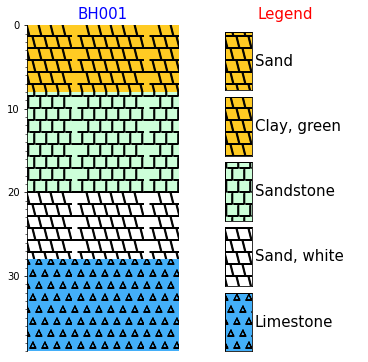

In [24]:
p.boreholes_3d[0].plot2d()

In [25]:
p.boreholes_3d[0].plot3d()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [26]:
p.boreholes_3d[0].plot3d(x3d=True)

### Display project boreholes

In [27]:
p.plot3d(labels_size=15, bg_color=["royalblue", "aliceblue"], window_size=(1300, 1000))

### Boreholes in 3D using X3D for interaction within the notebook